### Когортный анализ и Юнит экономина развлекательного приложения Procrastinate Pro+

<img src ='https://www.meme-arsenal.com/memes/12902c58b7c26a1b1b4b8be01e461665.jpg' width=500, height=300>



**Описание проекта:**

Я — маркетинговый аналитик развлекательного приложения Procrastinate Pro+.
Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.

**Цели исследования:**
* Разобраться в причинах почему компания терпит убытки и помочь компании выйти в плюс:
    1. Провести EDA имеющегося датасета: 
        * Составить профили пользователей с мин и макс датой
        * Проанализировать страны пользователей в том числе платящих
        * Проанализировать устройства пользователей в том числе платящих
        * Проанализировать рекламные источки привлечения пользователей в том числе платящих
    2. Маркетинговые расходы:
        * Общая сумма расходов на маркетинг
        * Распределение по источникам
        * Расходы в динамике по времени по источникам
        * Сколько стоило привлечение 1 пользователя (CAC)?
    3. Оценить окупаемость рекламы
        * Оценить окупаемость рекламы с помощью LTV, ROI, CAC
        * Проверить конверсию и удержание в динамике
        * Оценить окупаемость рекламы по Устройствам с помощью LTV, ROI, CAC
        * Оценить окупаемость рекламы по Странам с помощью LTV, ROI, CAC
        * Оценить окупаемость рекламы по Рекламным каналам с помощью LTV, ROI, CAC
    4. Написать вывод
    

**Ход исследования:**

Моё исследование пройдет в несколько этапов:
* Данные я получу из файлов типа .csv
* Обзор данных, посмотрю их качество
* Предобработка данных (проверка типов данных, проверка на пропуски и их заполнение или удаление, проверка категориальных значений, проверка на аномальные значения, проверка на дубликаты)
* Расчеты и добавление новых столбцов-результатов в таблицы
* Проведение анализа по целям исследования
* Написание общего вывода

**Описание данных:**

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:

* visits_info_short.csv - лог сервера с информацией о посещениях сайта/визиты:
    - User Id — уникальный идентификатор пользователя,
    - Region — страна пользователя,
    - Device — тип устройства пользователя,
    - Channel — идентификатор источника перехода,
    - Session Start — дата и время начала сессии,
    - Session End — дата и время окончания сессии.

* orders_info_short.csv - информация о заказах:
    - User Id — уникальный идентификатор пользователя,
    - Event Dt — дата и время покупки,
    - Revenue — сумма заказа.

* costs_info_short.csv - информация о расходах на рекламу:
    - dt — дата проведения рекламной кампании,
    - Channel — идентификатор рекламного источника,
    - costs — расходы на эту кампанию.

## 1. Загрузка данных

### 1.1 Импортируем библиотеки, откроем csv файлы

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
# magic function, отображает фигуру в блокноте рядом с кодом:
%matplotlib inline
# matplotlib/plot, графики с высоким разрешением:
%config InlineBackend.figure_format='retina' 

# уберем предупреждения
import warnings
warnings.filterwarnings("ignore")

In [2]:
# откроем .csv файл
# путь на платформе
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
# путь на локалке
except:
    visits = pd.read_csv('visits_info_short.csv')
    orders = pd.read_csv('orders_info_short.csv')
    costs = pd.read_csv('costs_info_short.csv')

### 1.2 Выведем основную информацию о таблицах

In [3]:
list1 = [visits , orders, costs]
for i in list1:
    display(i.info(), i.head(3))
    print('\n --------------------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

User Id         Region  Device  Channel        Session Start  \
0  981449118918  United States  iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States  iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States     Mac  organic  2019-05-01 14:09:25   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08


 --------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99


 --------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8


 --------------------------------------


Пропусков нет, типы данных надо немного поменять.

### 1.3 Преобразуем типы данных

In [4]:
# переименуем столбцы на питоний регистр
visits.rename(columns={
    'User Id': 'user_id',
    'Region': 'region',
    'Device': 'device',
    'Channel': 'channel',
    'Session Start': 'session_start',
    'Session End': 'session_end'},
    inplace=True)

orders.rename(columns={
    'User Id': 'user_id',
    'Event Dt': 'event_dt',
    'Revenue': 'revenue'},
    inplace=True)

costs.rename(columns={
    'Channel': 'channel',
    'Event Dt': 'event_dt',
    'Revenue': 'revenue'},
    inplace=True)  

In [5]:
# приведем типы данных к Дате
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

costs['dt'] = pd.to_datetime(costs['dt']).dt.date

# выделяем год, номер месяца и номер недели из времени начала сессии
visits['session_year'] = visits['session_start'].dt.year
visits['session_month'] = visits['session_start'].dt.month
visits['session_week'] = visits['session_start'].dt.isocalendar().week
visits['session_date'] = visits['session_start'].dt.date

In [6]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [7]:
# проверим дф
visits.head(3)

user_id         region  device  channel       session_start  \
0  981449118918  United States  iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States  iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States     Mac  organic 2019-05-01 14:09:25   

          session_end  session_year  session_month  session_week session_date  
0 2019-05-01 02:45:01          2019              5            18   2019-05-01  
1 2019-05-01 04:47:35          2019              5            18   2019-05-01  
2 2019-05-01 15:32:08          2019              5            18   2019-05-01

### 1.4   Проверим дф на явные дубликаты

In [8]:
# проверим на явные дубликаты строк
for i in list1:
    print(i.duplicated().sum())

0
0
0


In [9]:
# Проверим на уникальные значения и возможные ошибки в них:
if False: # закомментим длиннотекст, поменять на True при необходимости
    for i in list1:
        print('i')
        for col_name in i.columns:
            display(i[col_name].sort_values().unique())

Явных строк-дубликатов нет в датафремах, среди уникальных-категориальных значений дубликатов тоже нет, близких слов друг к другу с опечатками нет.

## 2. Функции для расчёта и анализа LTV, ROI, удержания и конверсии

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

<div class="alert alert-success">
<b>Комментарий ревьюера ✔️:</b> Получим функции из теории спринта</div>

### 2.1 Функции для вычисления значений метрик:

#### 2.1.1 get_profiles() — для создания профилей пользователей

In [10]:
def get_profiles(sessions, orders, ad_costs): # -events, event_names=[]

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

#     # добавляем флаги для всех событий из event_names
#     for event in event_names:
#         if event in events['event_name'].unique():
#             # проверяем, встречается ли каждый пользователь
#             # среди тех, кто совершил событие event
#             profiles[event] = profiles['user_id'].isin(
#                 events.query('event_name == @event')['user_id'].unique()
#             )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(
        0
    )
    
    return profiles  # возвращаем профили с CAC

#### 2.1.2 get_retention() — для подсчёта Retention Rate

In [11]:
def get_retention(profiles, sessions, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    
    # решаем какие столбцы оставим для группировки удержания, столбец признака платящего пользователя остается всегда
    dimensions = ['payer'] + dimensions
    
    # оттсекаем всех пользователей, которые не могли "дожить" до нужного горизонта 
    # (присоединились позже чем observation_date - horizon)
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # формируем массив сырых данных
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    # функция группировки по нужному набору измерений
    def group_by_dimensions(df, dims, horizon_days):     
        # строим "треугольную таблицу" 
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     
        # определяем размеры когорт
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) 
        # присоединяем размеры когорт к треугольной таблице
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   
        # делим каждый из столбцов на размер когорты - расчитываем % удержания (retention rate)
        result = result.div(result['cohort_size'], axis = 0)                                                     
        # оставляем только наблюдения до нужного горизонта и столбец размеров когорт
        result = result[['cohort_size'] + list(range(horizon_days))]                                             
        # пересприсваиваем столбец размеров когорт, ведь во время деления он превратился в 1
        result['cohort_size'] = cohort_sizes                                                                     
        return result
    
    # расчитываем удержание 
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # рассчитываем удержание по всем параметрам + дата
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем и таблицы удержания и сырые данные (чтобы в случае чего можно было в них покопаться при отладке)
    return result_raw, result_grouped, result_in_time

#### 2.1.3 get_conversion() — для подсчёта конверсии

In [12]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

#### 2.1.4 get_ltv() — для подсчёта LTV


In [13]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### 2.2 Функции для построения графиков:

#### 2.2.1 filter_data() — для сглаживания данных

In [14]:
# функция для сглаживания фрейма
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

#### 2.2.2 plot_retention() — для построения графика Retention Rate

In [15]:
# с window

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

#### 2.2.3 plot_conversion() — для построения графика конверсии



In [16]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

#### 2.2.4 plot_ltv_roi — для визуализации LTV и ROI



In [17]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## 3. EDA - Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

### 3.1 Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.

In [18]:
# Составим профили пользователей
profiles = get_profiles(visits, orders, costs)
display(profiles.head(3))
profiles.shape

user_id            first_ts   channel  device         region          dt  \
0   599326 2019-05-07 20:58:57  FaceBoom     Mac  United States  2019-05-07   
1  4919697 2019-07-09 12:46:07  FaceBoom  iPhone  United States  2019-07-09   
2  6085896 2019-10-01 09:58:33   organic  iPhone         France  2019-10-01   

       month  payer  acquisition_cost  
0 2019-05-01   True          1.088172  
1 2019-07-01  False          1.107237  
2 2019-10-01  False          0.000000

(150008, 9)

Почти 1/3 пользователей - органические

In [19]:
# доступный интервал привлечения пользователей
min_analysis_date = profiles['first_ts'].min().date()
max_analysis_date = profiles['first_ts'].max().date()
dif_date = (max_analysis_date - min_analysis_date).days
print(f'''Минимальная дата привлечения пользователей: {min_analysis_date}'
Максимальная дата привлечения пользователей: {max_analysis_date}
Разница дней: {dif_date}''')

Минимальная дата привлечения пользователей: 2019-05-01'
Максимальная дата привлечения пользователей: 2019-10-27
Разница дней: 179


In [20]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
analysis_horizon = horizon_days = 14  # горизонт анализа

### 3.2 Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.


In [21]:
result_raw, result_grouped, result_in_time = get_retention(
        profiles, visits, observation_date, analysis_horizon, dimensions = ['region'], ignore_horizon = False)

In [22]:
# напишем функцию которая будет выдавать платящую группу по категории и доли построчно
def pivot(cat = []):
    cat_gr = (profiles
              .pivot_table(index=cat,values='payer',aggfunc=['count', 'sum'])
             )
    # переименуем колонку добавим категорию
    cat_gr.rename(columns ={'count':'count_user', 'sum':'sum_payer'}, inplace=True)
    cat_gr.columns = cat_gr.columns.droplevel(1)
    # посчитаем долю платящих пользователей по странам, отсортируем
    cat_gr['share_payer'] = (cat_gr['sum_payer'] / cat_gr['count_user'])
    cat_gr = cat_gr.sort_values(by='share_payer', ascending=False)
    return cat_gr

In [23]:
# посмотрим категорию по Региону
cat_region = pivot(cat = ['region'])
cat_region

count_user  sum_payer  share_payer
region                                           
United States      100002       6902     0.069019
Germany             14981        616     0.041119
UK                  17575        700     0.039829
France              17450        663     0.037994

Больше всего платящих пользователей - США, а также доля платящих по стране лидер тоже США (почти 6,9% от пользователей региона от всего региона платят).

### 3.3 Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.


In [24]:
# посмотрим категорию по Устройствам
cat_dev = pivot(cat = ['device'])
cat_dev

count_user  sum_payer  share_payer
device                                     
Mac           30042       1912     0.063644
iPhone        54479       3382     0.062079
Android       35032       2050     0.058518
PC            30455       1537     0.050468

Наибольшее кол-во платящих пользователей по устройству -iPhone, а если рассматривать по долям внутри устройств то среди Mac-овцев доля платящих максимальная - 6,3%.

### 3.4 Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [25]:
# посмотрим по Каналам привлечения
cat_channel = pivot(cat = ['channel'])
cat_channel

count_user  sum_payer  share_payer
channel                                               
FaceBoom                 29144       3557     0.122049
AdNonSense                3880        440     0.113402
lambdaMediaAds            2149        225     0.104700
TipTop                   19561       1878     0.096007
RocketSuperAds            4448        352     0.079137
WahooNetBanner            8553        453     0.052964
YRabbit                   4312        165     0.038265
MediaTornado              4364        156     0.035747
LeapBob                   8553        262     0.030633
OppleCreativeMedia        8605        233     0.027077
organic                  56439       1160     0.020553

Наибольшее кол-во платящих пользователей по Каналам привлечения -FaceBoom, TipTop, а если рассматривать по долям внутри каналов то среди доля платящих максимальная у FaceBoom(12,2%), AdNonSense (11,3%), lambdaMediaAds(10,5%)

## 4. Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

### 4.1 Посчитайте общую сумму расходов на маркетинг.

In [26]:
print('Общая сумма расходов на маркетинг составила:', int(costs['costs'].sum()))

Общая сумма расходов на маркетинг составила: 105497


### 4.2 Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [27]:
costs_channel = (costs
                 .groupby('channel')[['costs']]
                 .sum()
                 .sort_values(by='costs', ascending=False)
                )
# посчитаем доли рекламных источников
costs_sum = sum(costs_channel['costs'])
costs_channel['share_costs'] = costs_channel['costs'] / costs_sum
costs_channel

costs  share_costs
channel                                  
TipTop              54751.30     0.518983
FaceBoom            32445.60     0.307549
WahooNetBanner       5151.00     0.048826
AdNonSense           3911.25     0.037074
OppleCreativeMedia   2151.25     0.020392
RocketSuperAds       1833.00     0.017375
LeapBob              1797.60     0.017039
lambdaMediaAds       1557.60     0.014764
MediaTornado          954.48     0.009047
YRabbit               944.22     0.008950

Самые большие траты на рекламные источники: TipTop	-54751.30 (52%), FaceBoom-32445.60 (31%)

### 4.3 Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.

In [28]:
# добавим столбец с месяцем и неделей
costs['costs_month_num'] = pd.to_datetime(costs['dt']).dt.month
costs['costs_week_num'] = pd.to_datetime(costs['dt']).dt.isocalendar().week

# округлим до месяца и недели
costs['costs_week'] = costs['dt'].astype('datetime64[W]')
costs['costs_month'] = costs['dt'].astype('datetime64[M]')
costs.head(3)

dt   channel  costs  costs_month_num  costs_week_num costs_week  \
0  2019-05-01  FaceBoom  113.3                5              18 2019-04-25   
1  2019-05-02  FaceBoom   78.1                5              18 2019-05-02   
2  2019-05-03  FaceBoom   85.8                5              18 2019-05-02   

  costs_month  
0  2019-05-01  
1  2019-05-01  
2  2019-05-01

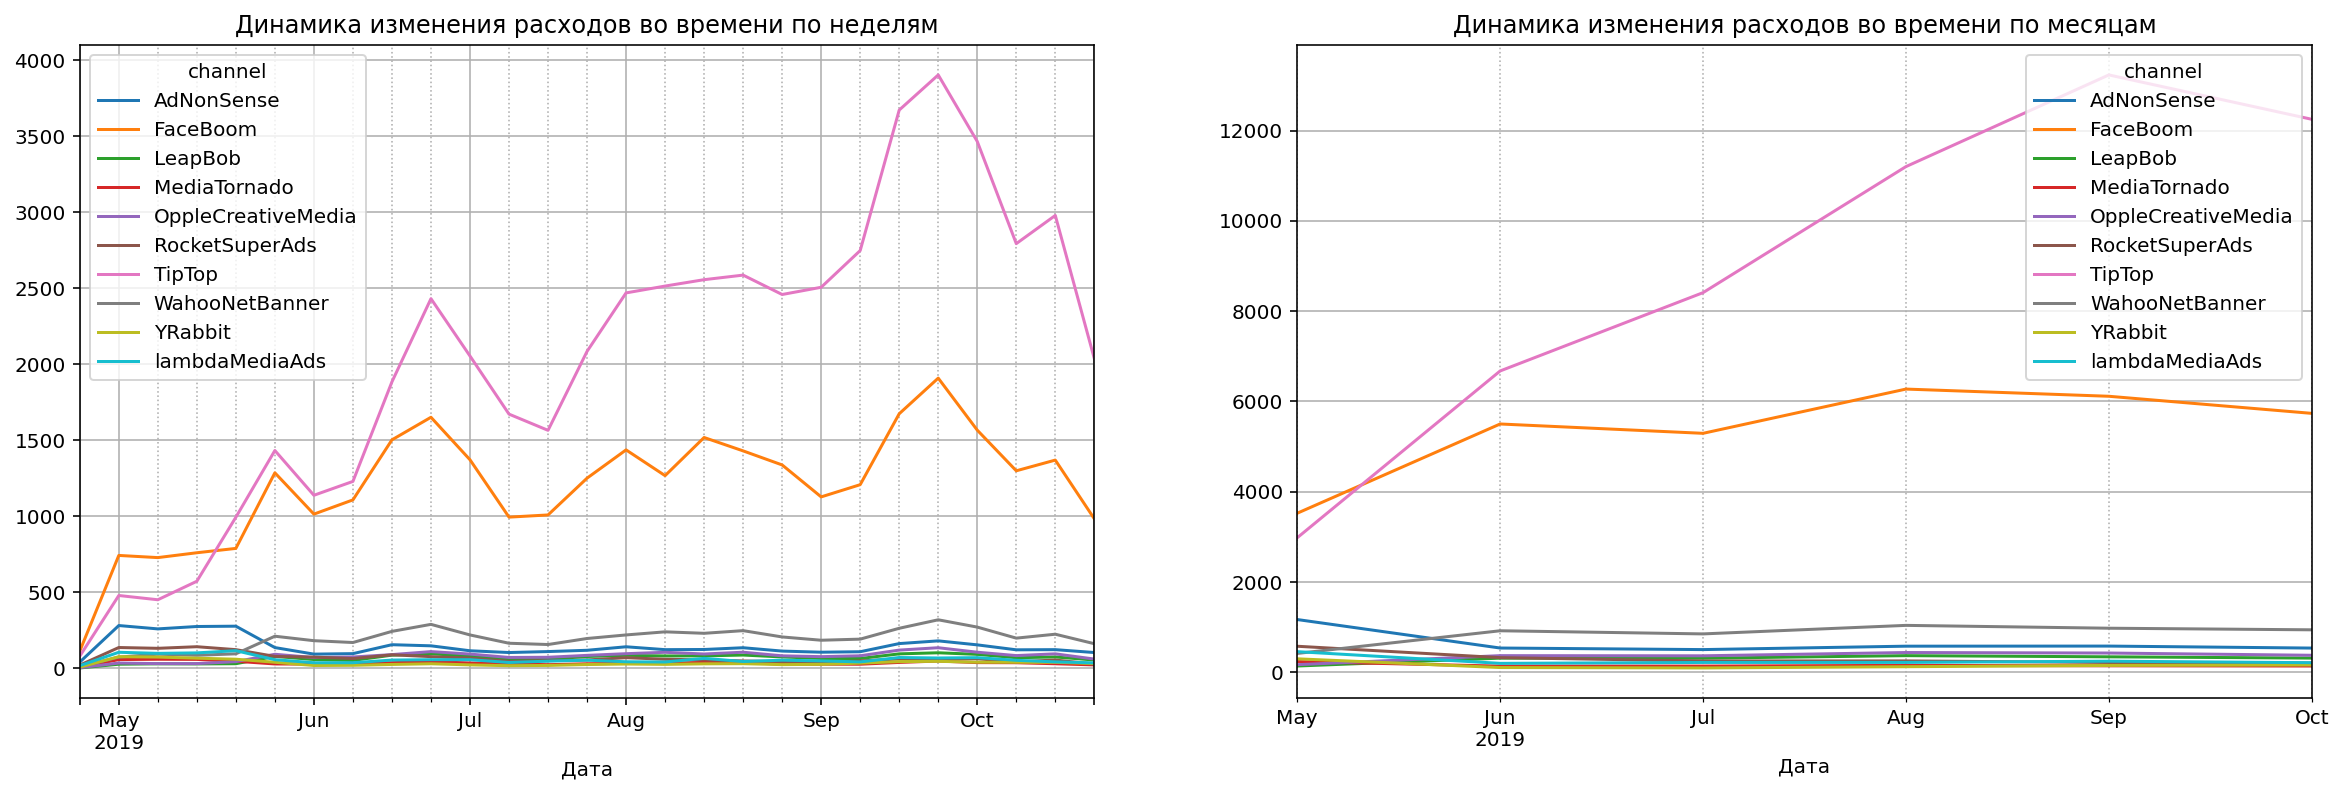

In [29]:
# построим графики, зададим поле под 2шт
plt.figure(figsize=(20,6))
# 1 по неделям
costs.pivot_table(index = 'costs_week',
                  columns = 'channel',
                  values = 'costs',
                  aggfunc = 'sum'
).plot(grid=True,
       ax=plt.subplot(1, 2, 1))
plt.xlabel('Дата')
plt.title('Динамика изменения расходов во времени по неделям')
plt.grid(b=True, which='minor', axis='both', linestyle=':')

# 2 по месяцам
costs.pivot_table(index = 'costs_month',
                  columns = 'channel',
                  values = 'costs',
                  aggfunc = 'sum'
).plot(grid=True,
       ax=plt.subplot(1, 2, 2))
plt.xlabel('Дата')
plt.title('Динамика изменения расходов во времени по месяцам')
plt.grid(b=True, which='minor', axis='both', linestyle=':')
plt.show()

В сентябре пик расходов на источники. Топ источников по расходам: TipTop, FaceBoom.

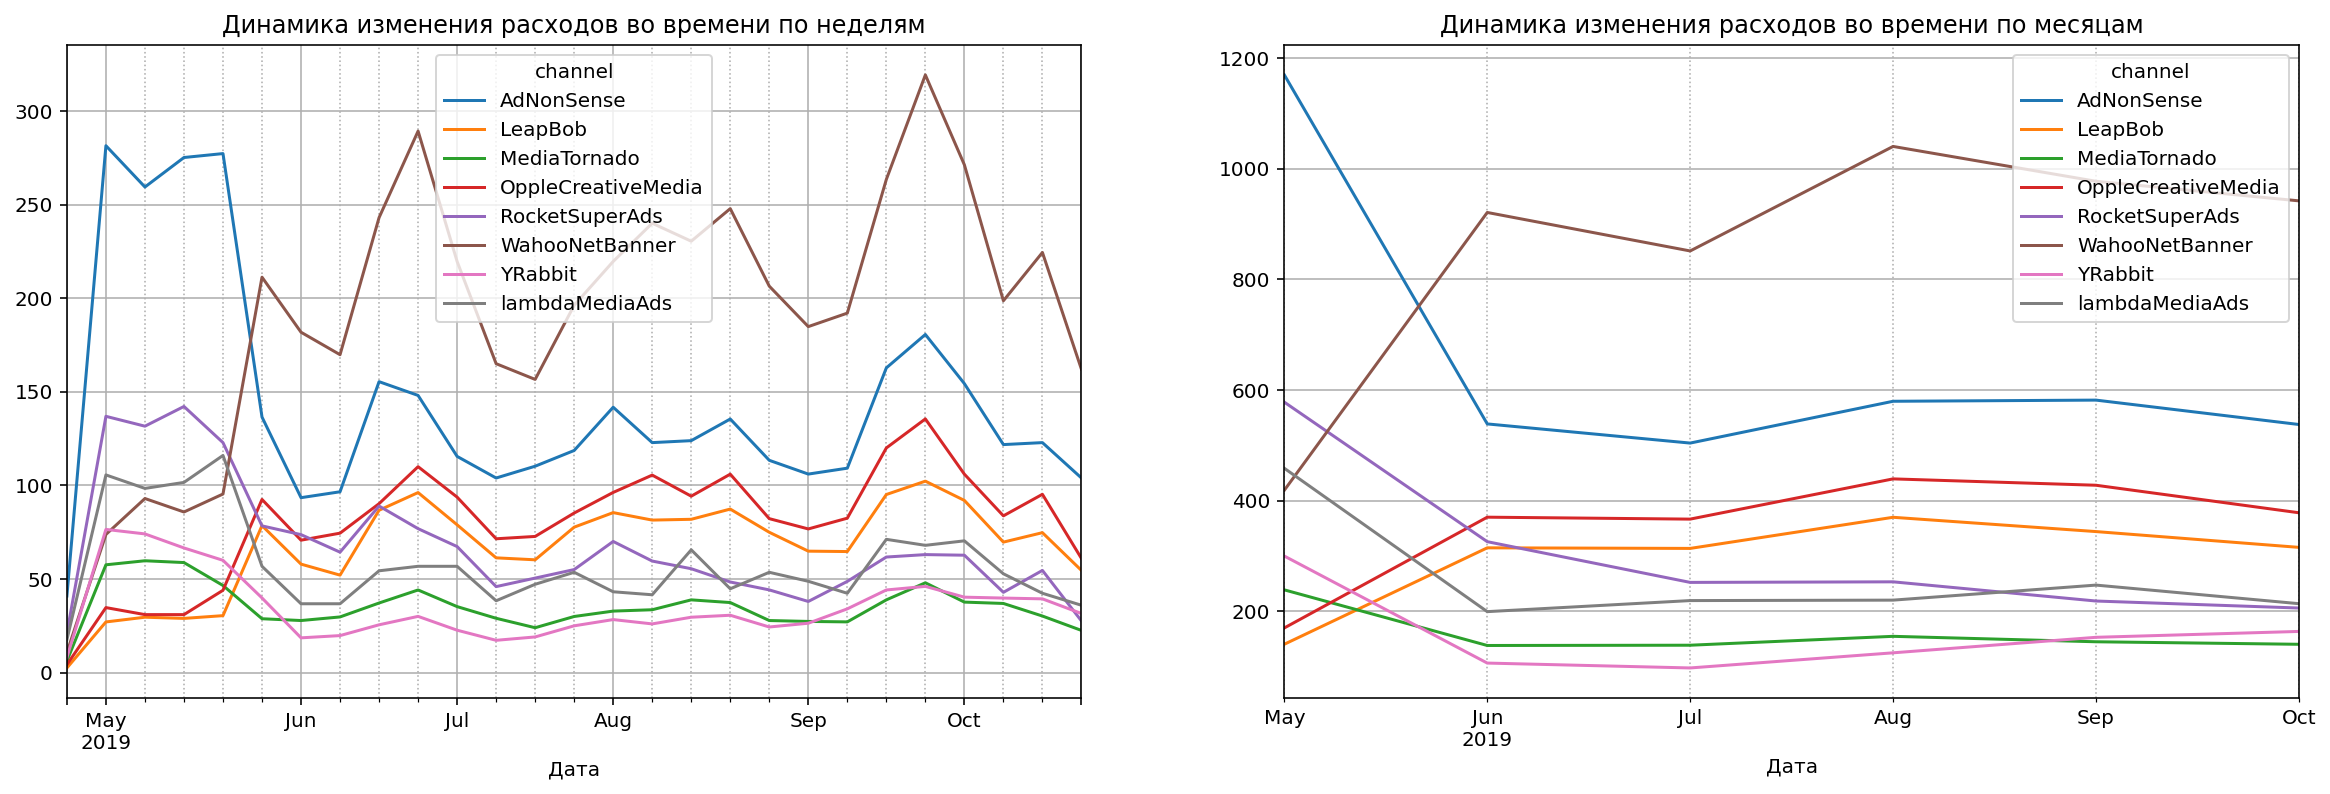

In [30]:
# построим графики без самых затратных каналов TipTop и FaceBoom
plt.figure(figsize=(20,6))
# 1 по неделям
(costs.query('channel != "TipTop" and channel != "FaceBoom"')
 .pivot_table(index = 'costs_week',
              columns = 'channel',
              values = 'costs',
              aggfunc = 'sum')
 ).plot(grid=True,
        ax=plt.subplot(1, 2, 1))
plt.xlabel('Дата')
plt.title('Динамика изменения расходов во времени по неделям')
plt.grid(b=True, which='minor', axis='both', linestyle=':')

# 2 по месяцам
(costs.query('channel != "TipTop" and channel != "FaceBoom"')
 .pivot_table(index = 'costs_month',
              columns = 'channel',
              values = 'costs',
              aggfunc = 'sum')
 ).plot(grid=True,
       ax=plt.subplot(1, 2, 2))
plt.xlabel('Дата')
plt.title('Динамика изменения расходов во времени по месяцам')
plt.grid(b=True, which='minor', axis='both', linestyle=':')
plt.show()

На минимальных уровнях из отличительного: расходы на AdNonSense падают, а расходы на WahooNetBanner растут.

### 4.4 Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

In [31]:
cac_channel_mean = (profiles.groupby('channel')[['acquisition_cost']]
                    .mean()
                    .sort_values(by='acquisition_cost', ascending=False)
                    )
acquisition_cost_mean = cac_channel_mean['acquisition_cost'].mean()
print(f'Среднее CAC: {acquisition_cost_mean}')
cac_channel_mean['deviation'] = (acquisition_cost_mean - cac_channel_mean['acquisition_cost'])
cac_channel_mean

Среднее CAC: 0.6870317251014001


acquisition_cost  deviation
channel                                        
TipTop                      2.799003  -2.111971
FaceBoom                    1.113286  -0.426254
AdNonSense                  1.008054  -0.321022
lambdaMediaAds              0.724802  -0.037771
WahooNetBanner              0.602245   0.084787
RocketSuperAds              0.412095   0.274936
OppleCreativeMedia          0.250000   0.437032
YRabbit                     0.218975   0.468057
MediaTornado                0.218717   0.468315
LeapBob                     0.210172   0.476860
organic                     0.000000   0.687032

У TipTop самое дорогое привлечение: 2,8ед. за 1 пользователя в среднем. Также немного завышено от среднего CAC у FaceBoom и AdNonSense.

## 5. Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

### 5.1 Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [32]:
# Уберем профили органических пользователей для оценки рекламы
profiles = profiles.query('channel != "organic"')
profiles.shape

(93569, 9)

Почти 1/3 пользователей - органические.

In [33]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа

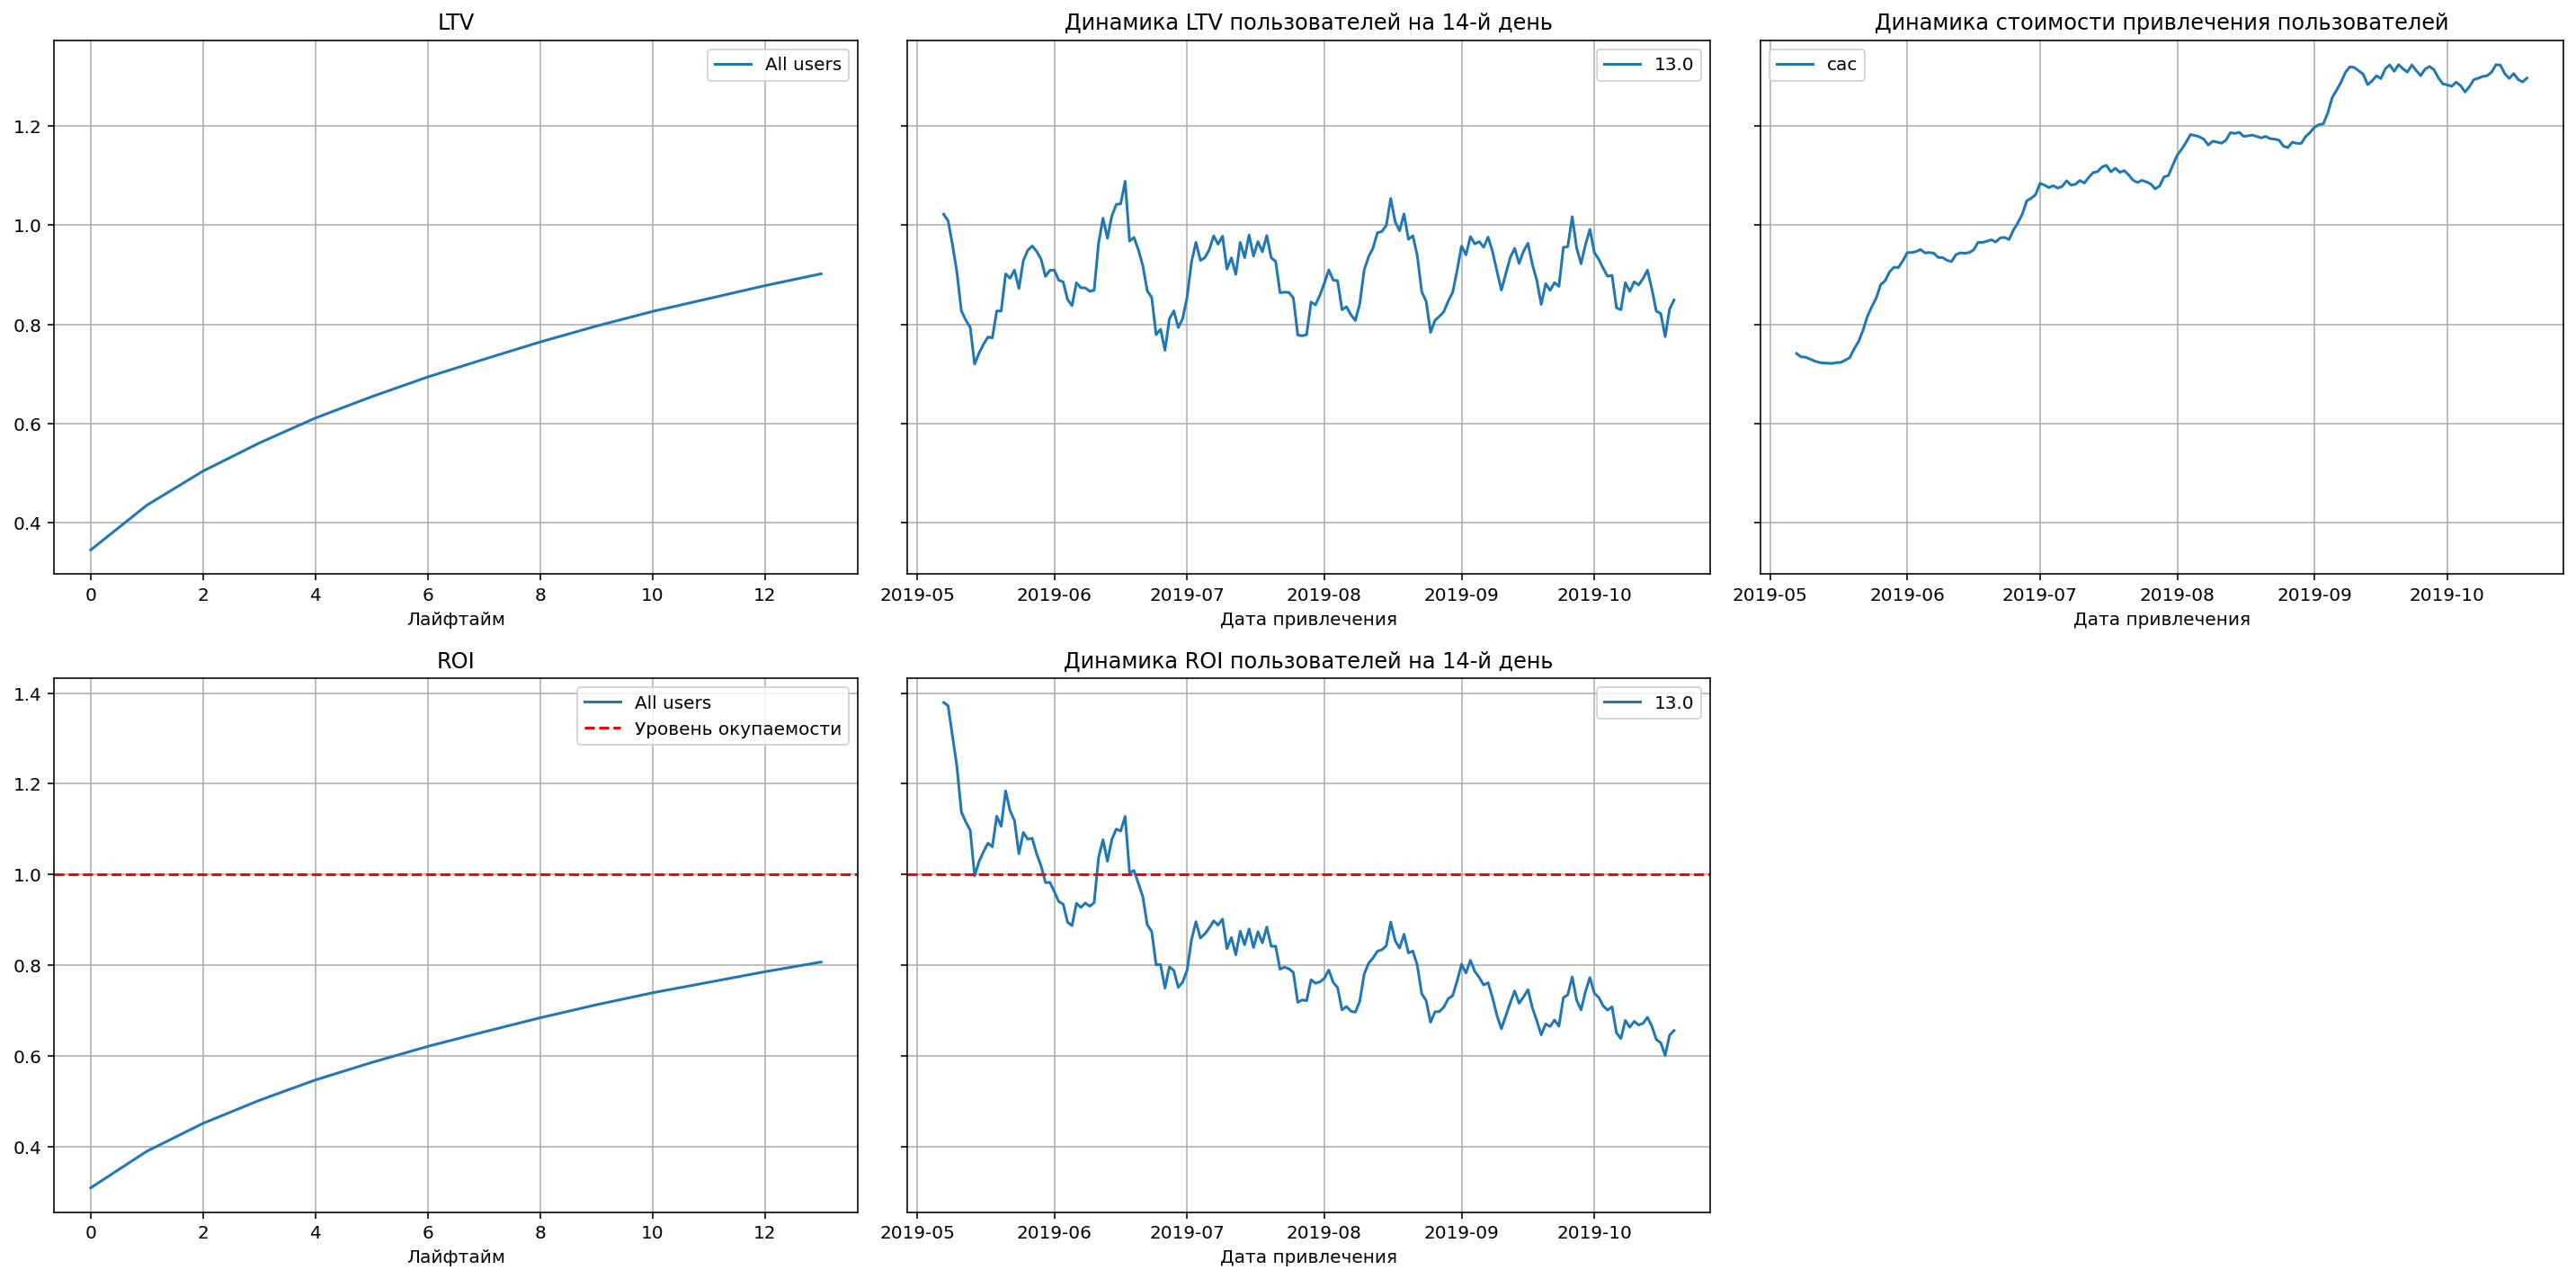

In [34]:
# считаем LTV и ROI, без разбивки по dimensions 
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
# сглаживание window=7 по умолчанию
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

1. LTV (пожизненная ценность клиента) в целом стабилен в динамике и качество пользователей хорошее. Есть небольшое влияние сезонности.
2. Реклама в среднем не окупается (без учета органических пользователей). Если посмотреть в динамике, ROI сначала окупался а потом для более новых когорт начиная с 6 месяца падает.
3. САС (стоимость привлечения клиента) не стабильный, от даты к дате он неуклонно растет, каждый пользователь становиться дороже, что влияет на окупаемость ROI.

### 5.2 Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.

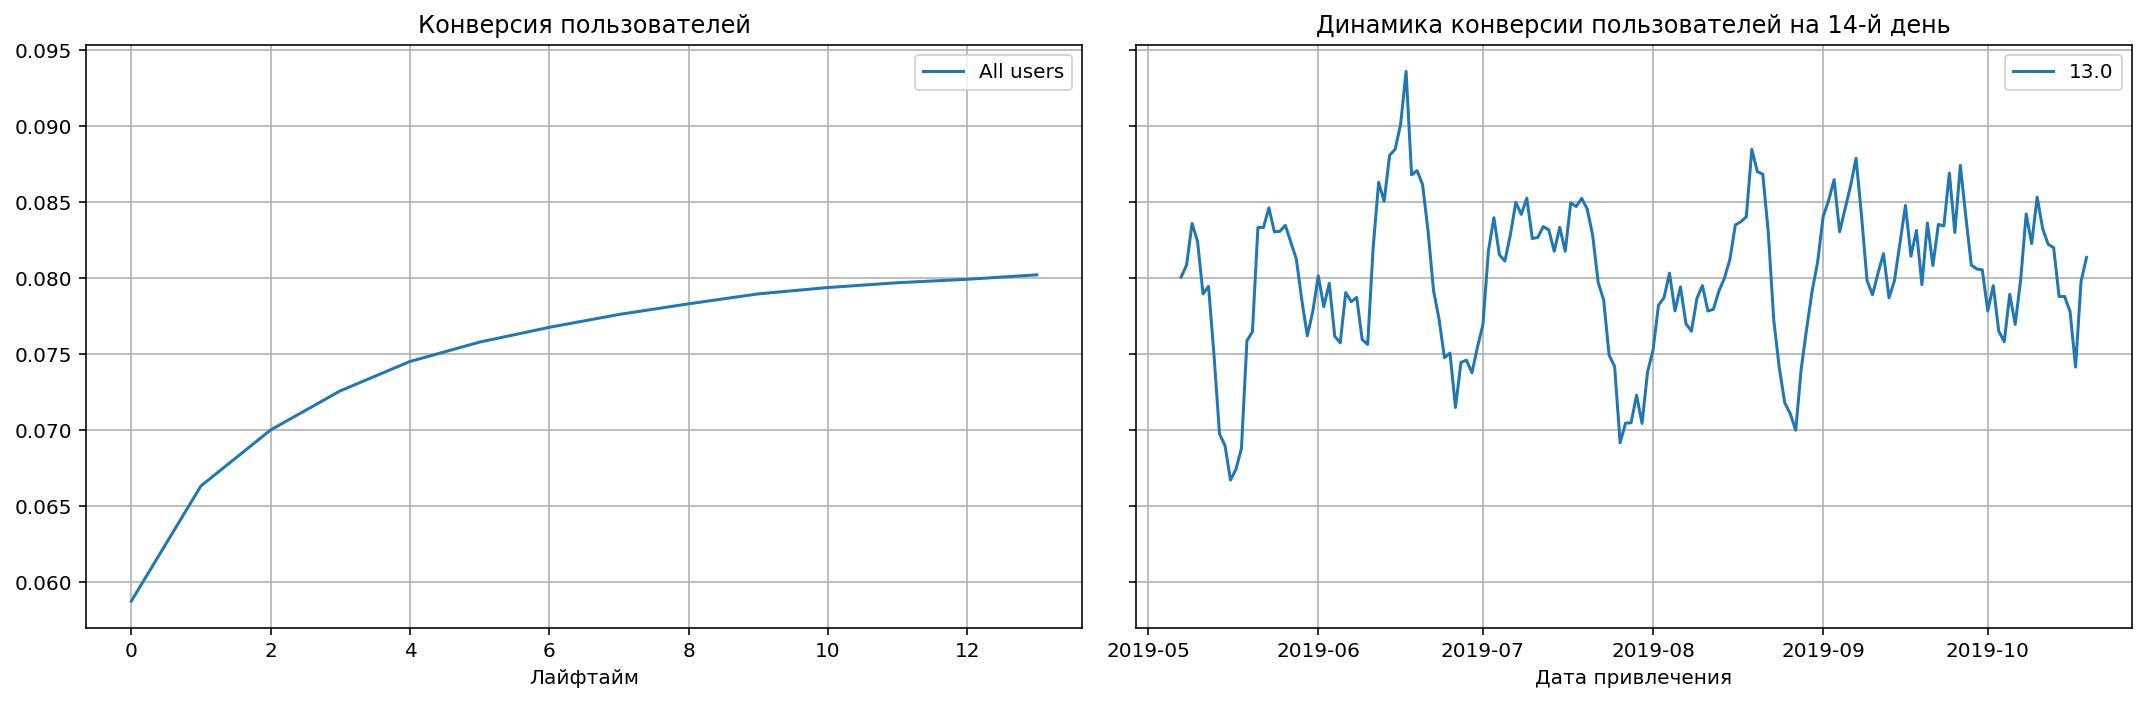

In [35]:
# смотрим конверсию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

# строим график конверсии
plot_conversion(conversion_grouped, conversion_history, horizon_days) 
# сглаживание window=7 по умолчанию

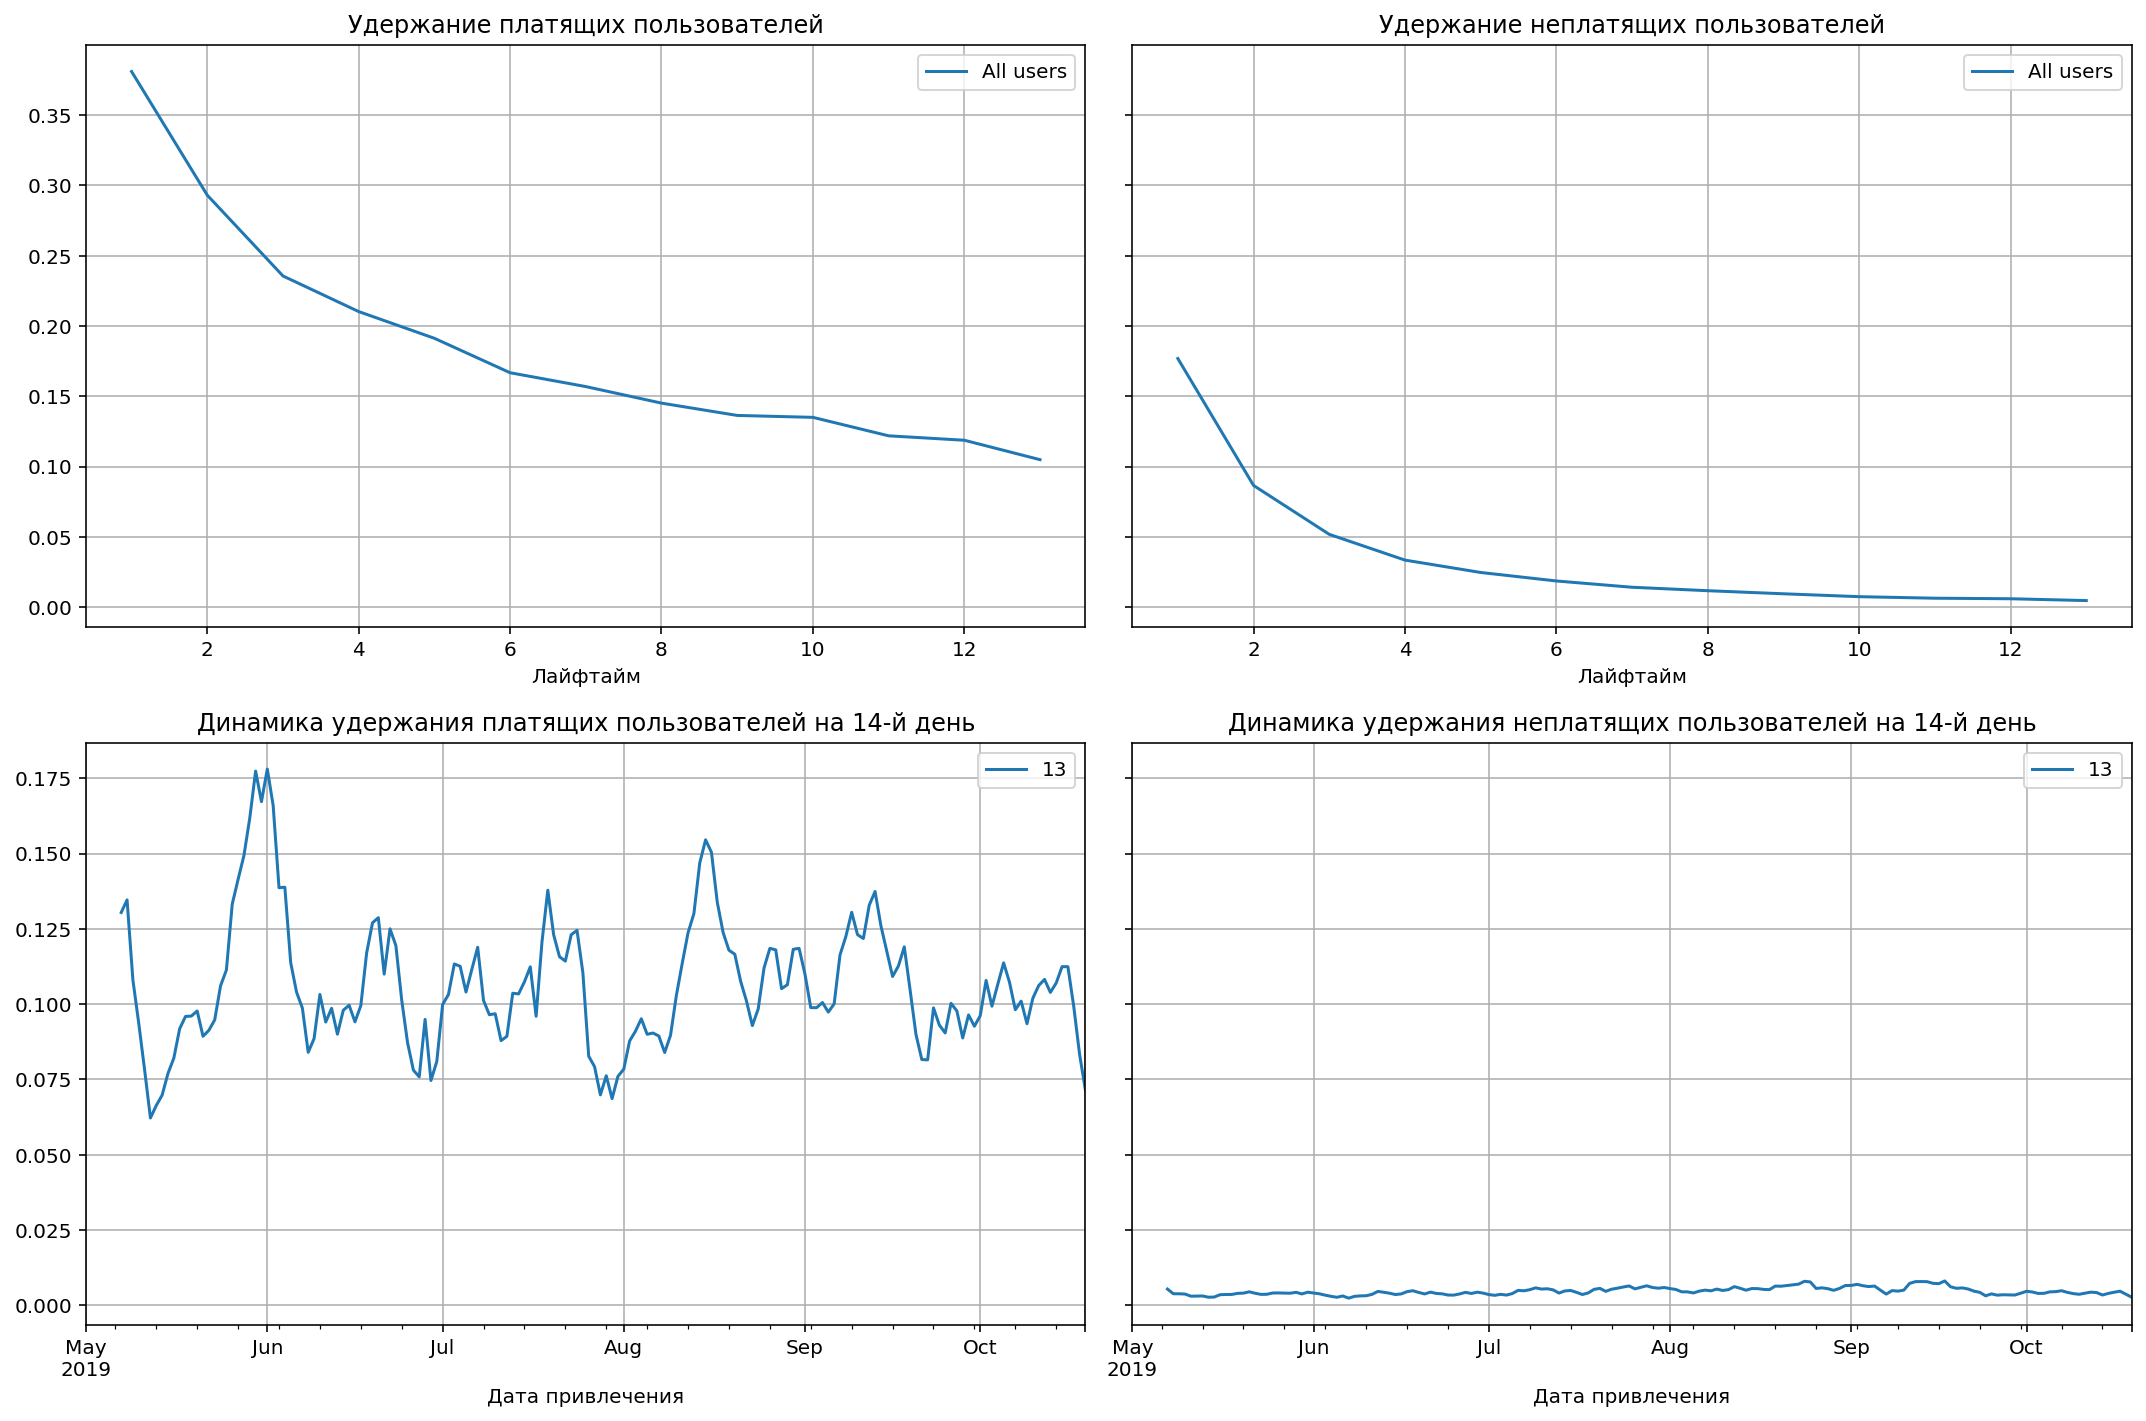

In [36]:
# смотрим удержание
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

# строим график удержания
plot_retention(retention_grouped, retention_history, horizon_days)
# сглаживание window=7 по умолчанию

Ничего обычного тут не выявлено, будем смотреть дальше по категориям. Динамика конверсии выглядит немного волнообразно +- кратно месяцу, возможно в нашем продукте есть какая-то подписочная система на месяц.

### 5.3 Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

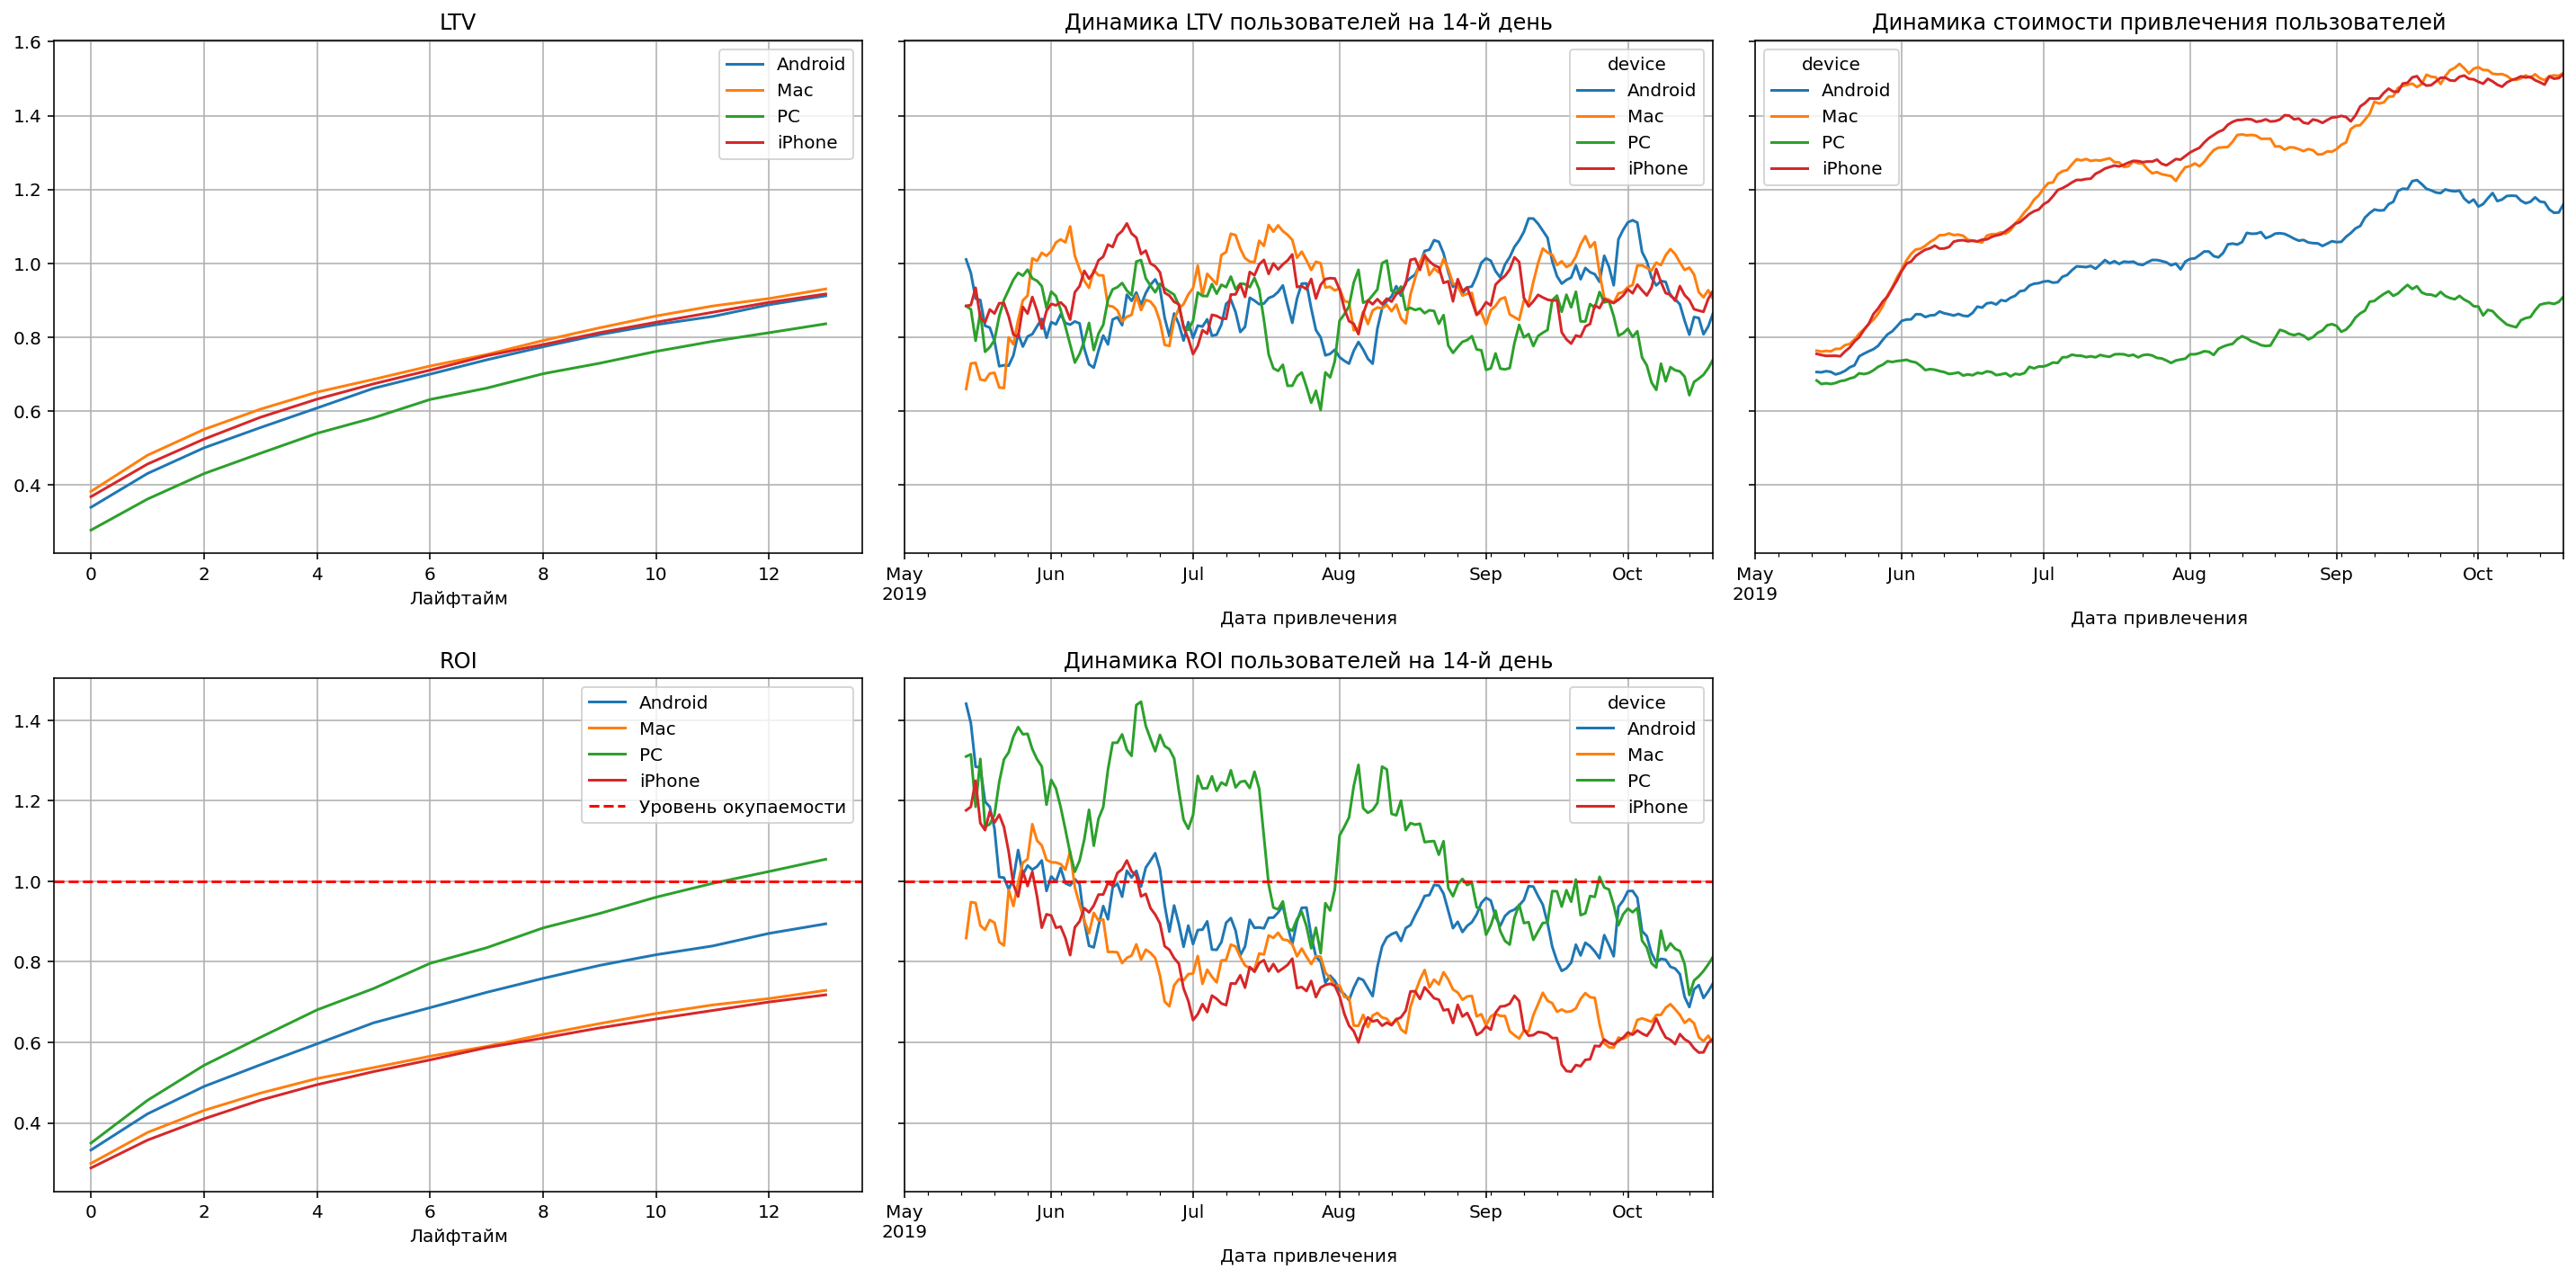

In [37]:
# считаем LTV и ROI, с dimensions по устройствам
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = dimensions
)

# строим графики LTV, CAC, ROI
# сглаживание window=7 по умолчанию, изменим на 14 дней
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

* Пользователи с PC окупаются в теч.11 дней. Пользователи Mac и iPhone - нет. Пользователи Android по серединке (90%), должны в последствии окупиться.
* А также стоимость привлечения Mac и iPhone дороже привлечения пользователей PC в 2 раза.

In [38]:
# Посмотрим в каких странах Mac и iPhone больше всего
(profiles.pivot_table(index= ['region','device'],
                #colimns='',
                values='user_id',
                aggfunc='nunique')
    ).sort_values(by='user_id', ascending=False)

user_id
region        device          
United States iPhone     27548
              Mac        15424
              Android    12436
              PC          6421
UK            PC          4551
France        PC          4384
Germany       PC          3797
France        Android     3313
UK            Android     3243
Germany       Android     2849
UK            iPhone      2274
France        iPhone      2198
Germany       iPhone      1862
France        Mac         1163
UK            Mac         1086
Germany       Mac         1020

* Наибольшая доля держателей Mac и iPhone находиться в США.

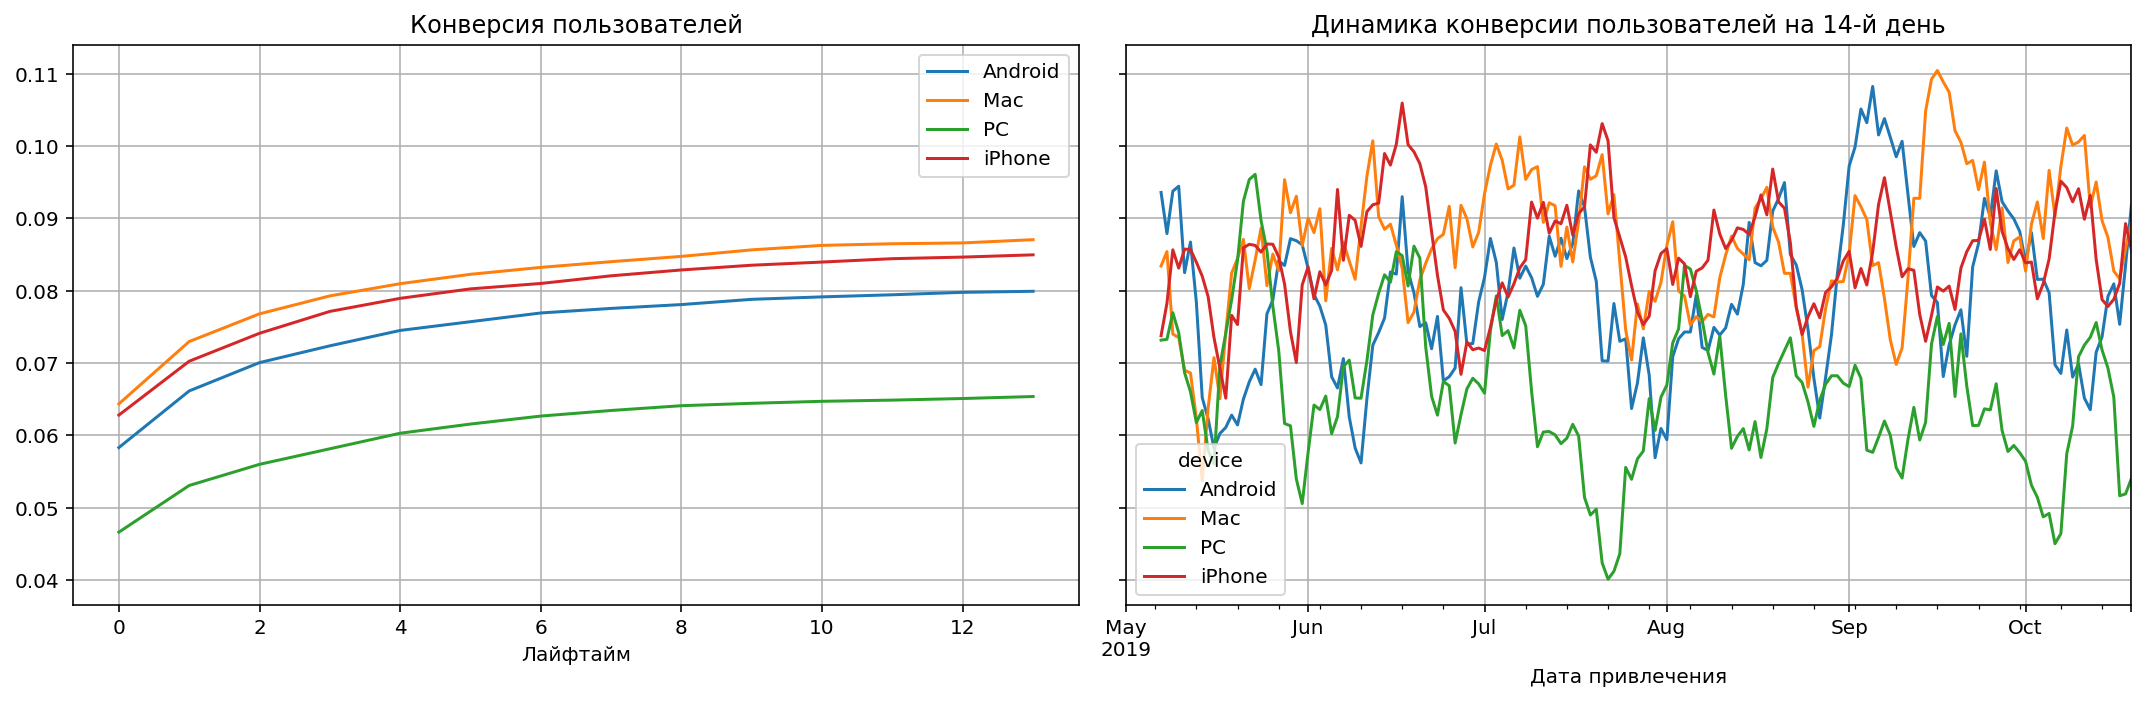

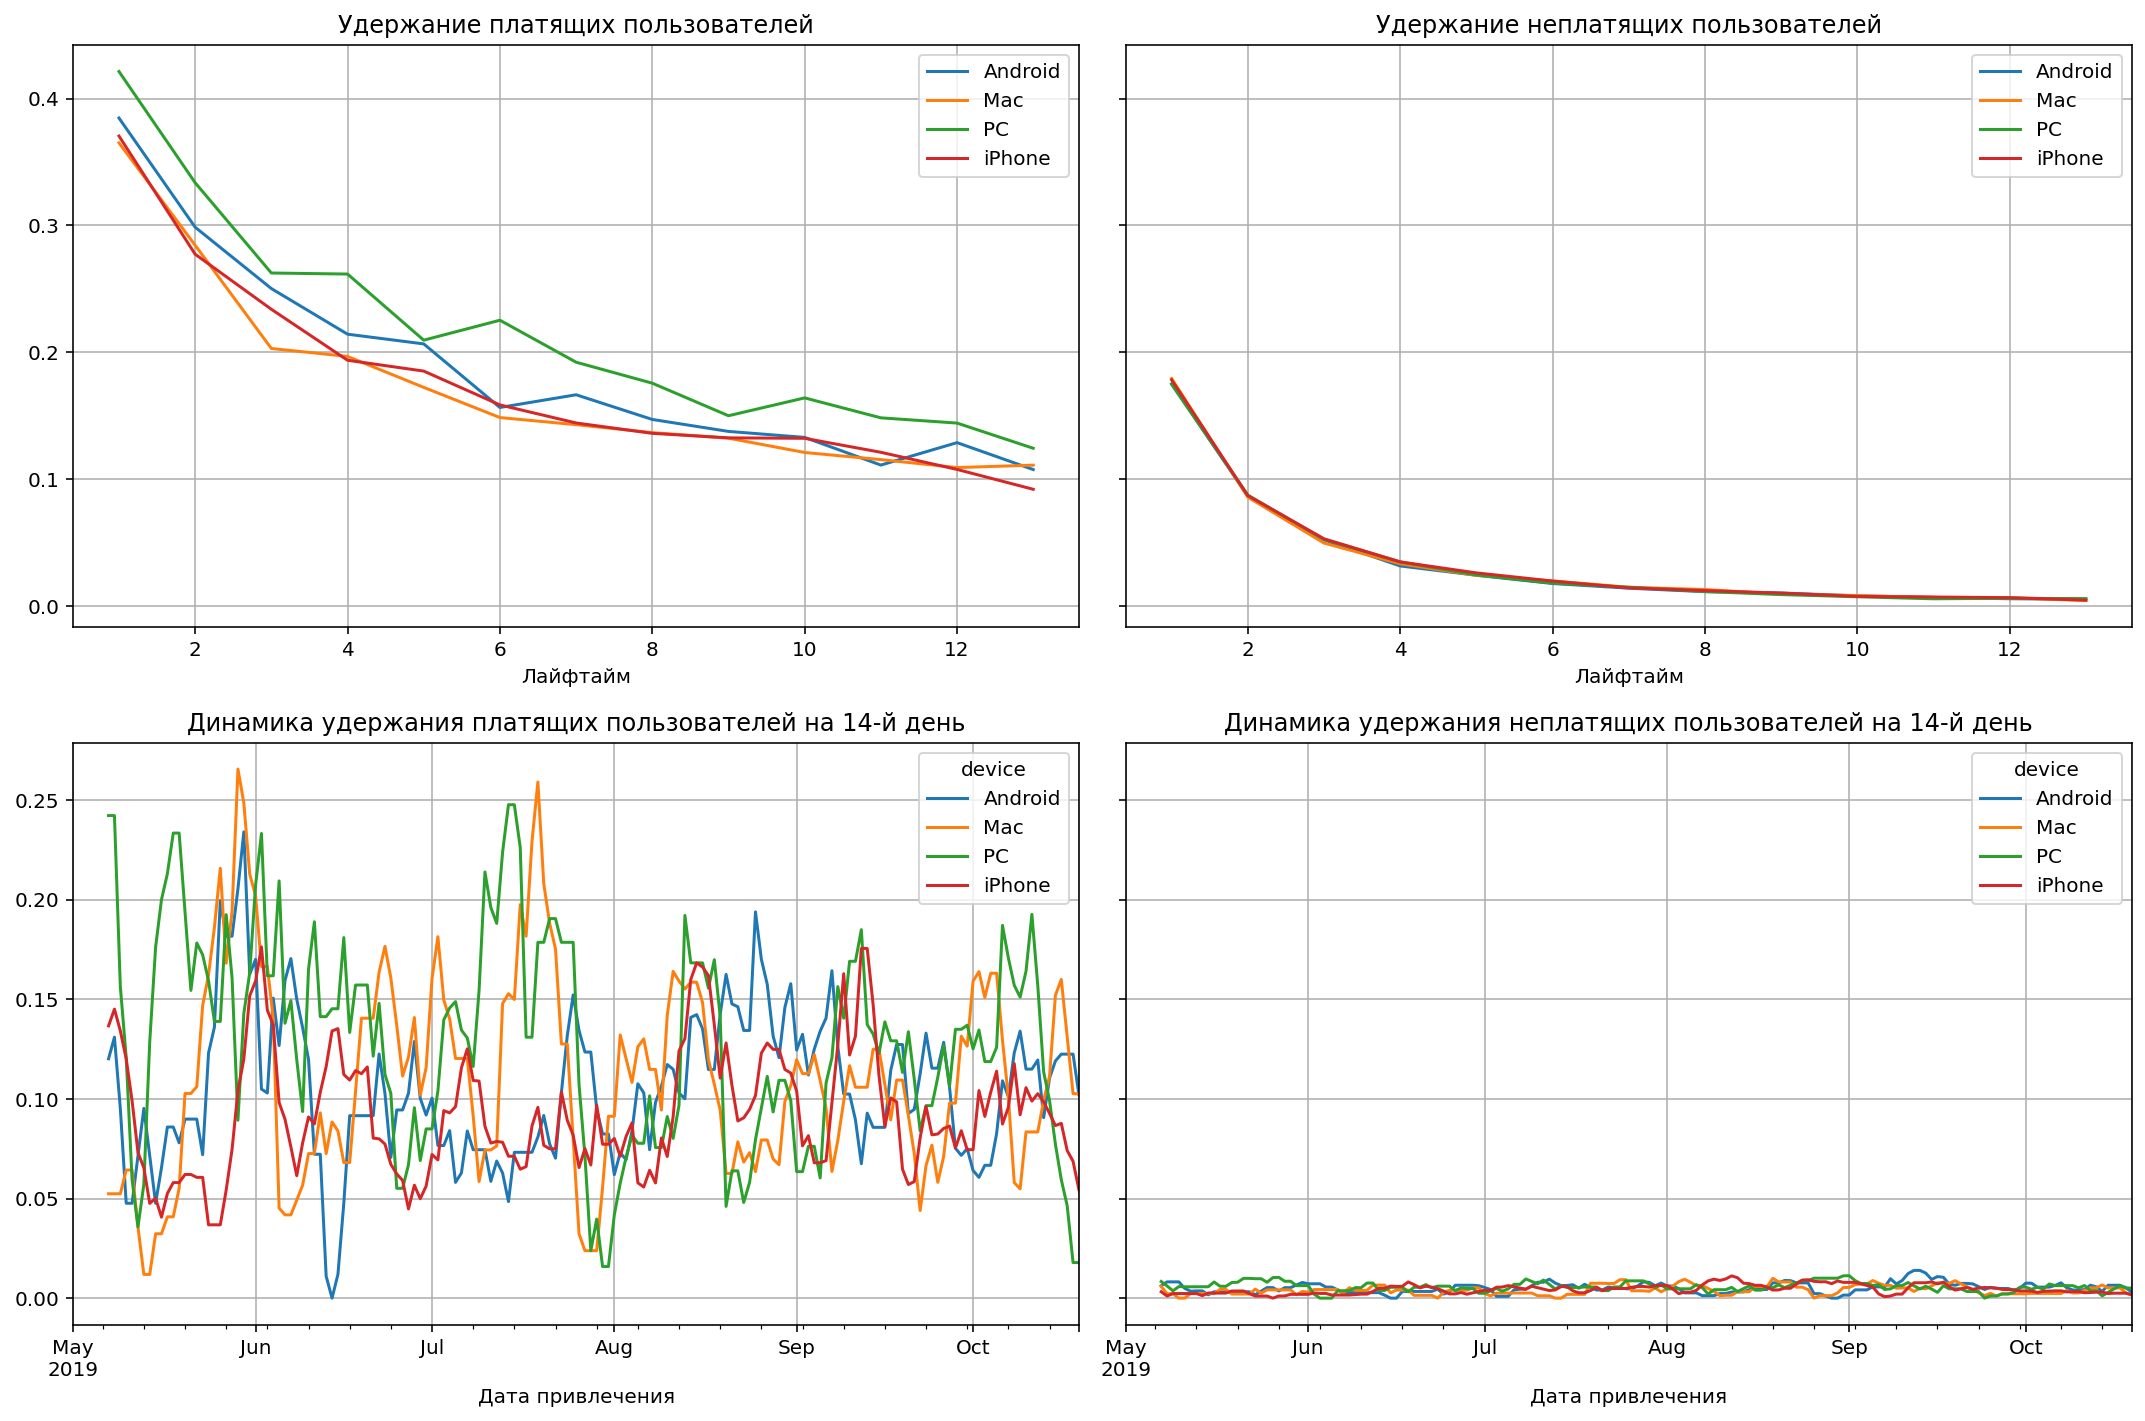

In [39]:
# дополнительно посмотрим конверсию и удержанию по Устройствам
dimensions = ['device']

# смотрим конверсию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions
)
# строим график конверсии
plot_conversion(conversion_grouped, conversion_history, horizon_days) 
# сглаживание window=7 по умолчанию


# смотрим удержание
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions
)
# строим график удержания
plot_retention(retention_grouped, retention_history, horizon_days)
# сглаживание window=7 по умолчанию

### 5.4 Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

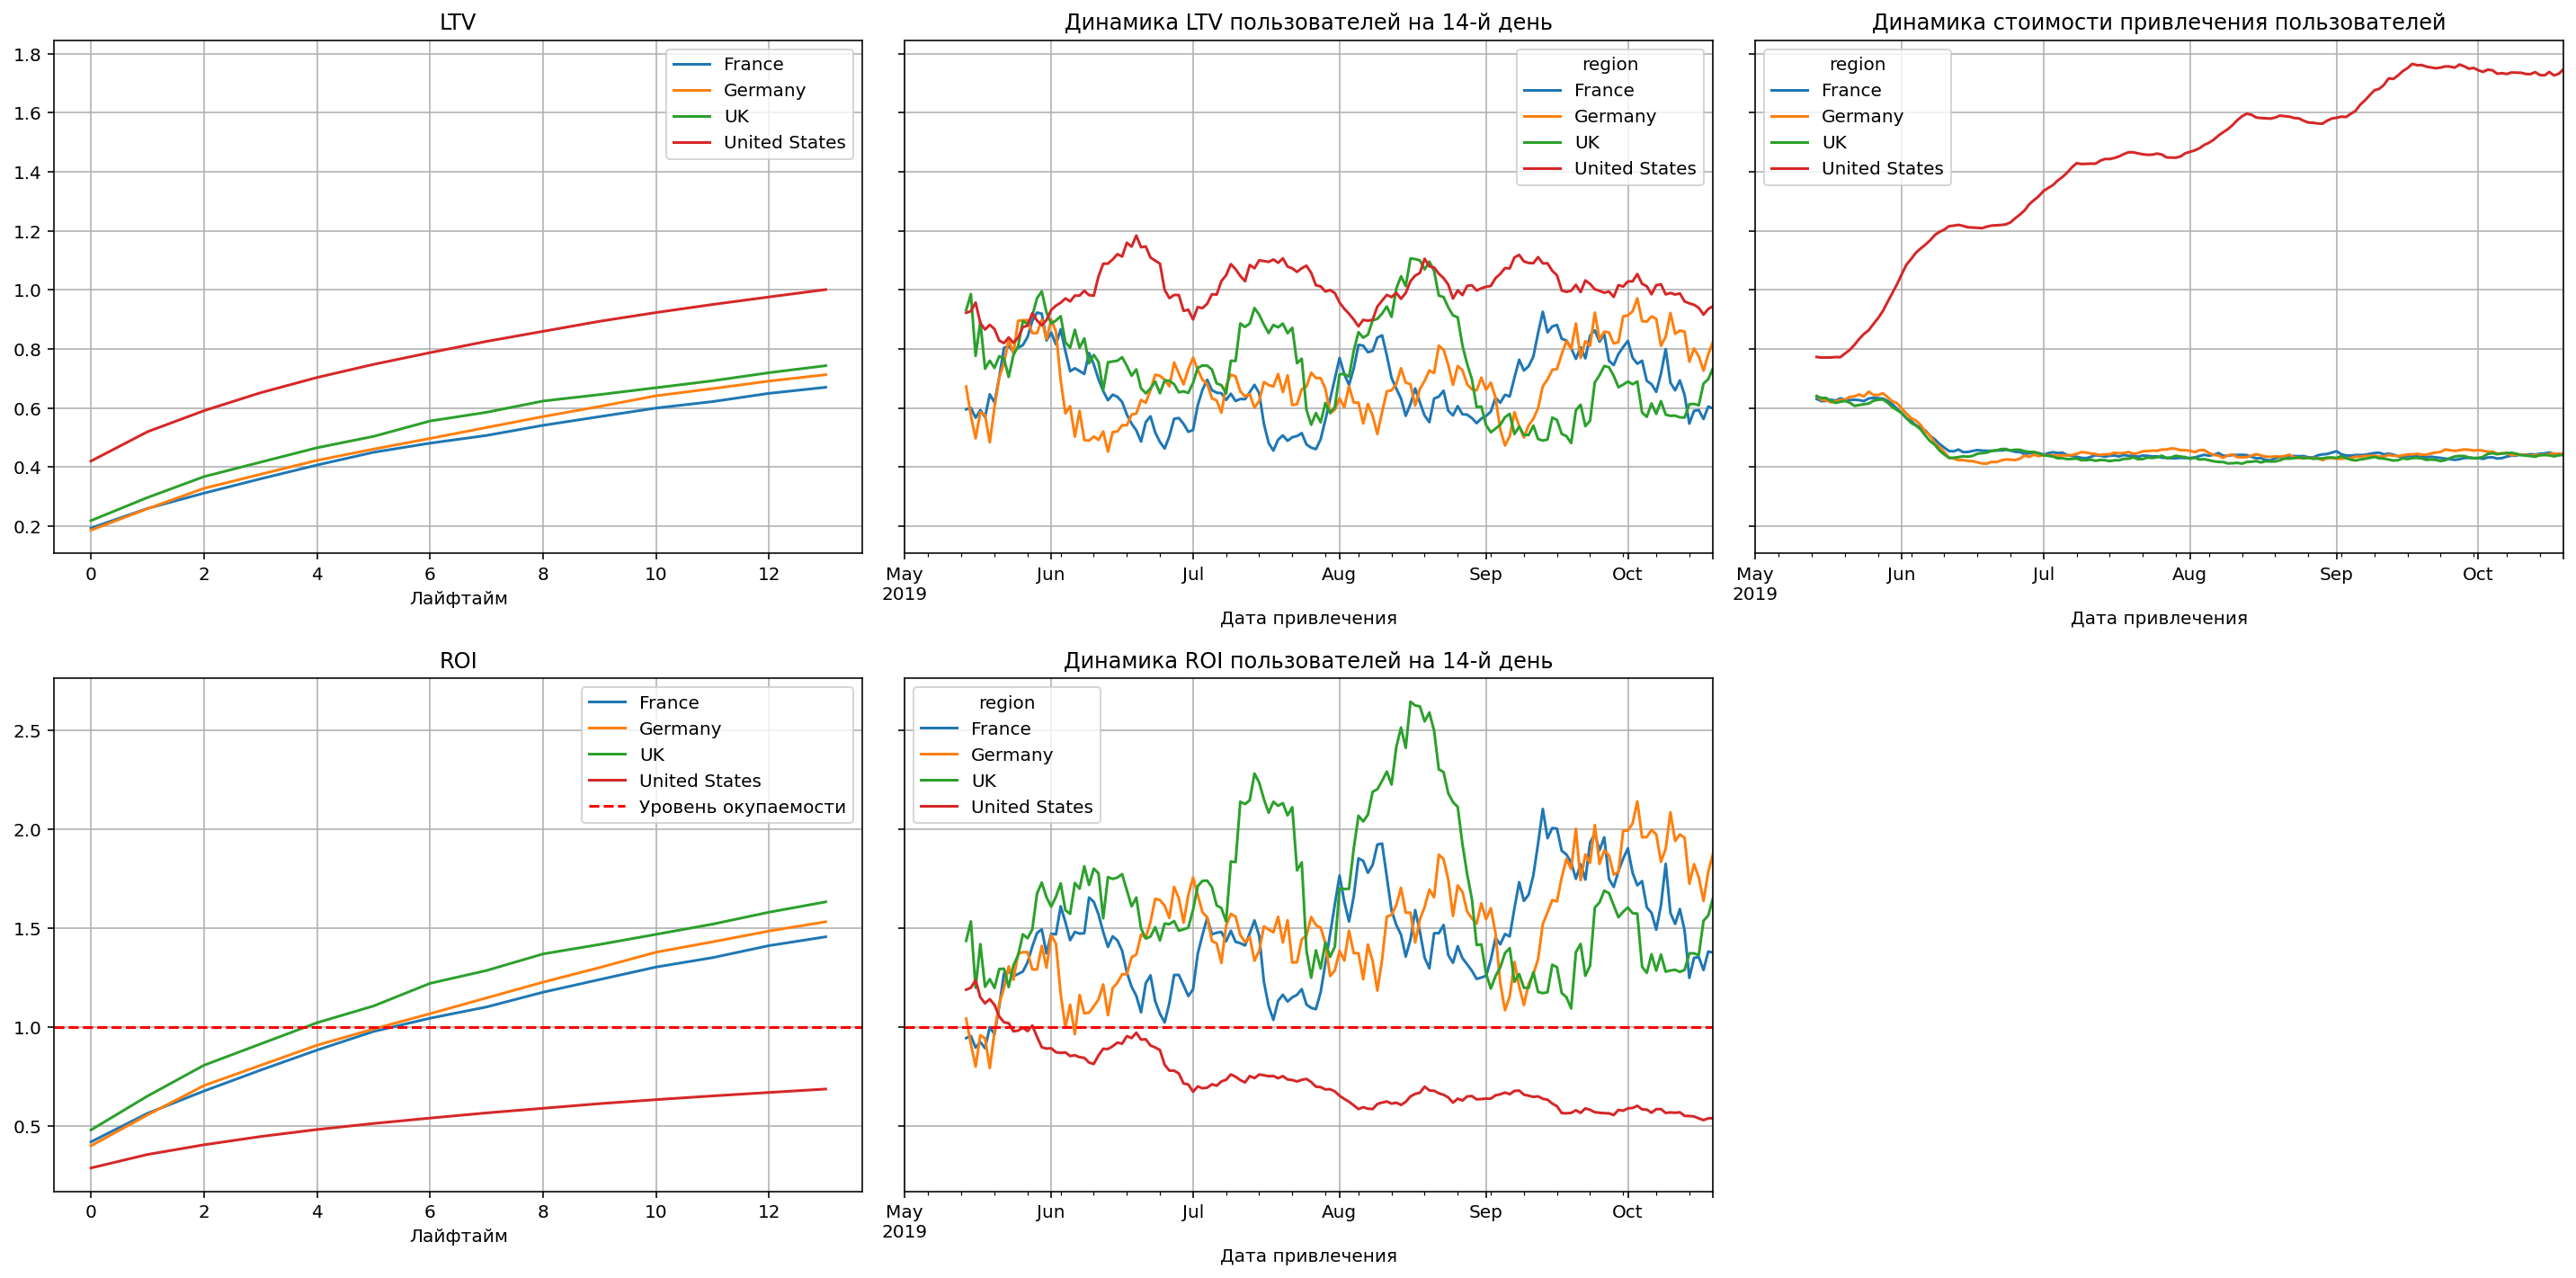

In [40]:
# считаем LTV и ROI, с dimensions по устройствам
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = dimensions)

# строим графики LTV, CAC, ROI
# сглаживание window=7 по умолчанию, изменим на 14 дней
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

* По странам видно что США сильно выбивается, у неё самый высокий LTV, но очень завышенная цена привлечения пользователя почти в 4 раза выше и из-за этого это единственная страна которая не окупается по ROI. Также ROI США в динамике у новых когорт сильно понизился.

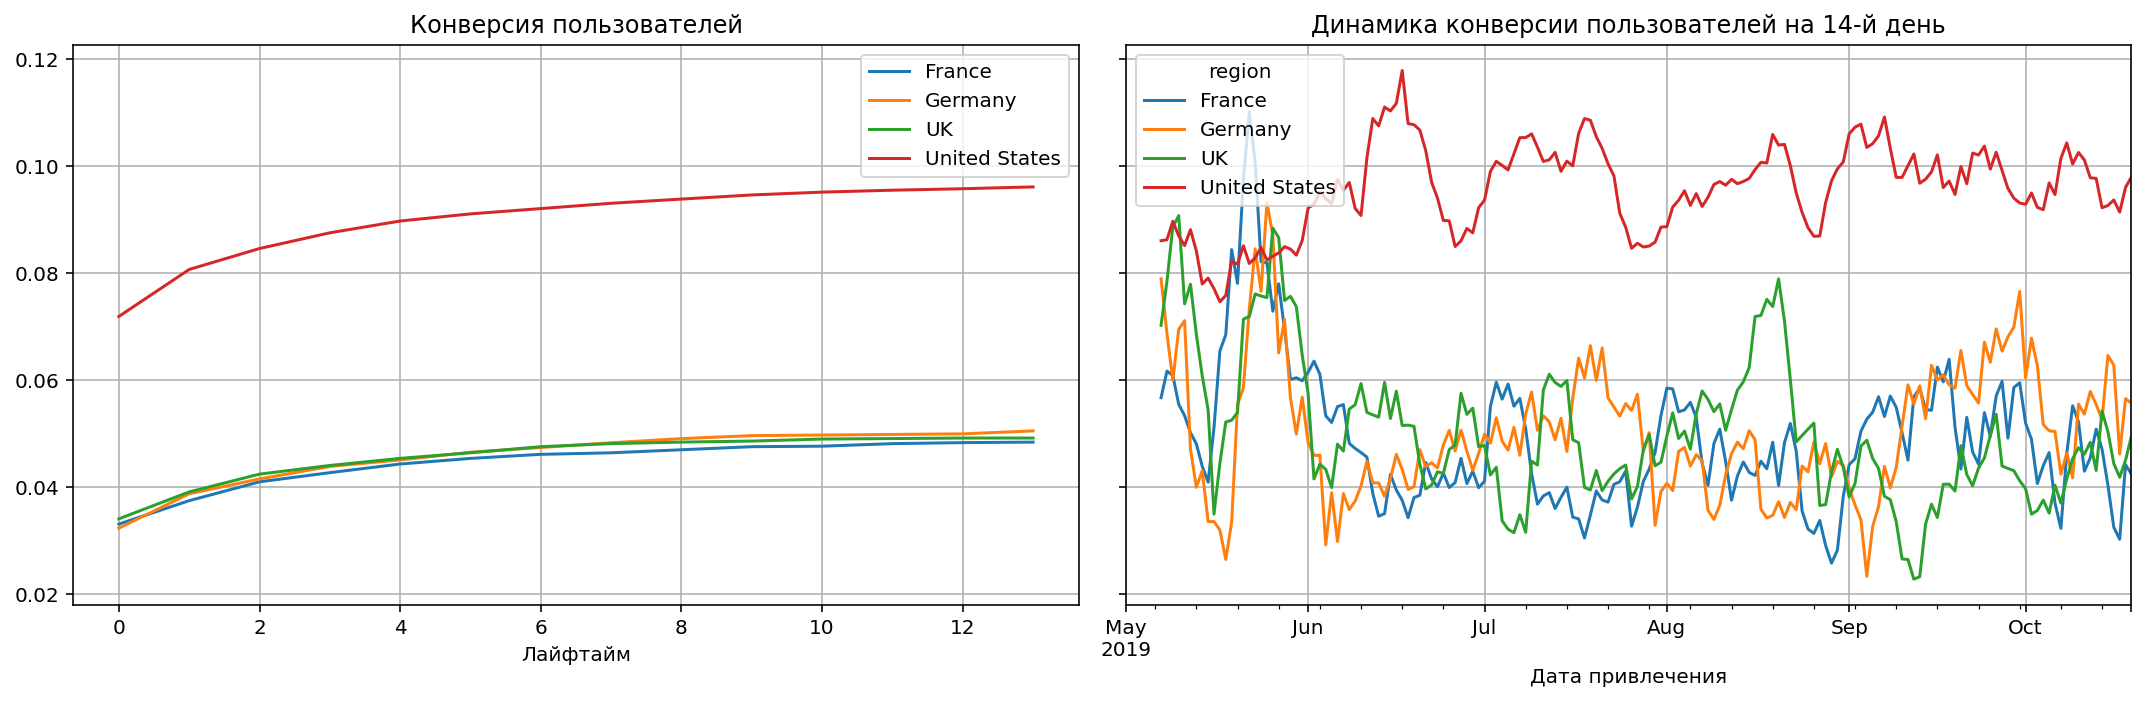

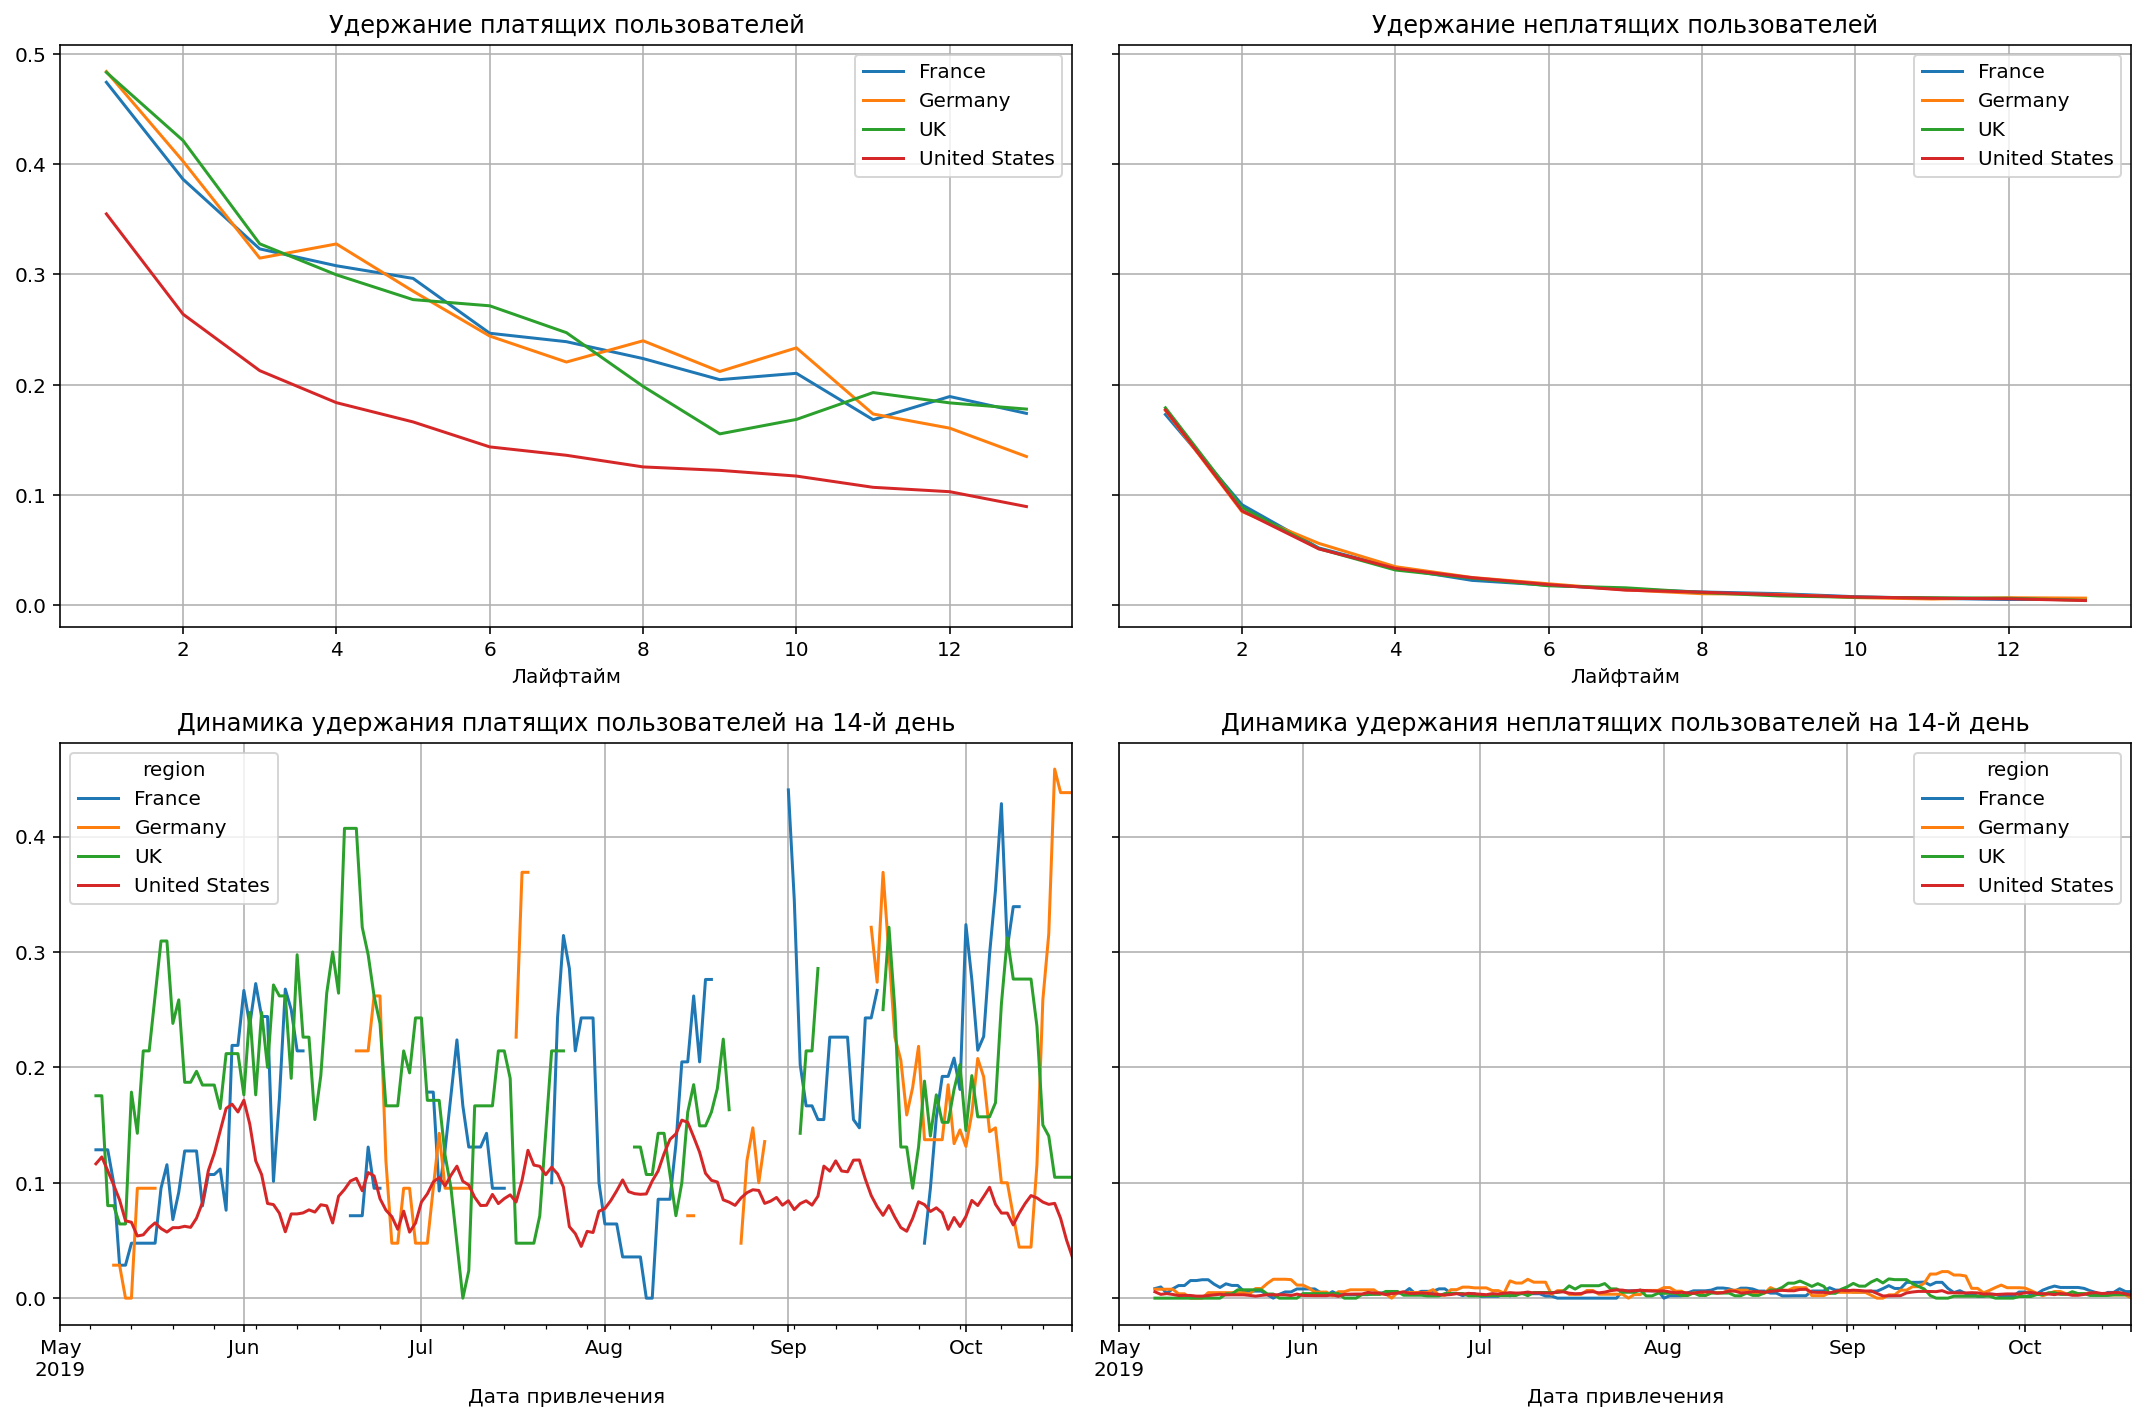

In [41]:
# дополнительно посмотрим конверсию и удержанию по странам
dimensions = ['region']

# смотрим конверсию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions
)
# строим график конверсии
plot_conversion(conversion_grouped, conversion_history, horizon_days) 
# сглаживание window=7 по умолчанию


# смотрим удержание
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions
)
# строим график удержания
plot_retention(retention_grouped, retention_history, horizon_days)
# сглаживание window=7 по умолчанию

* Конверсия по США просто отличная. Удержание в США заметно проседает в отличии от других, возможно дело в рекламных каналах либо есть какая то техническая проблема конкретно для США.

### 5.5 Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

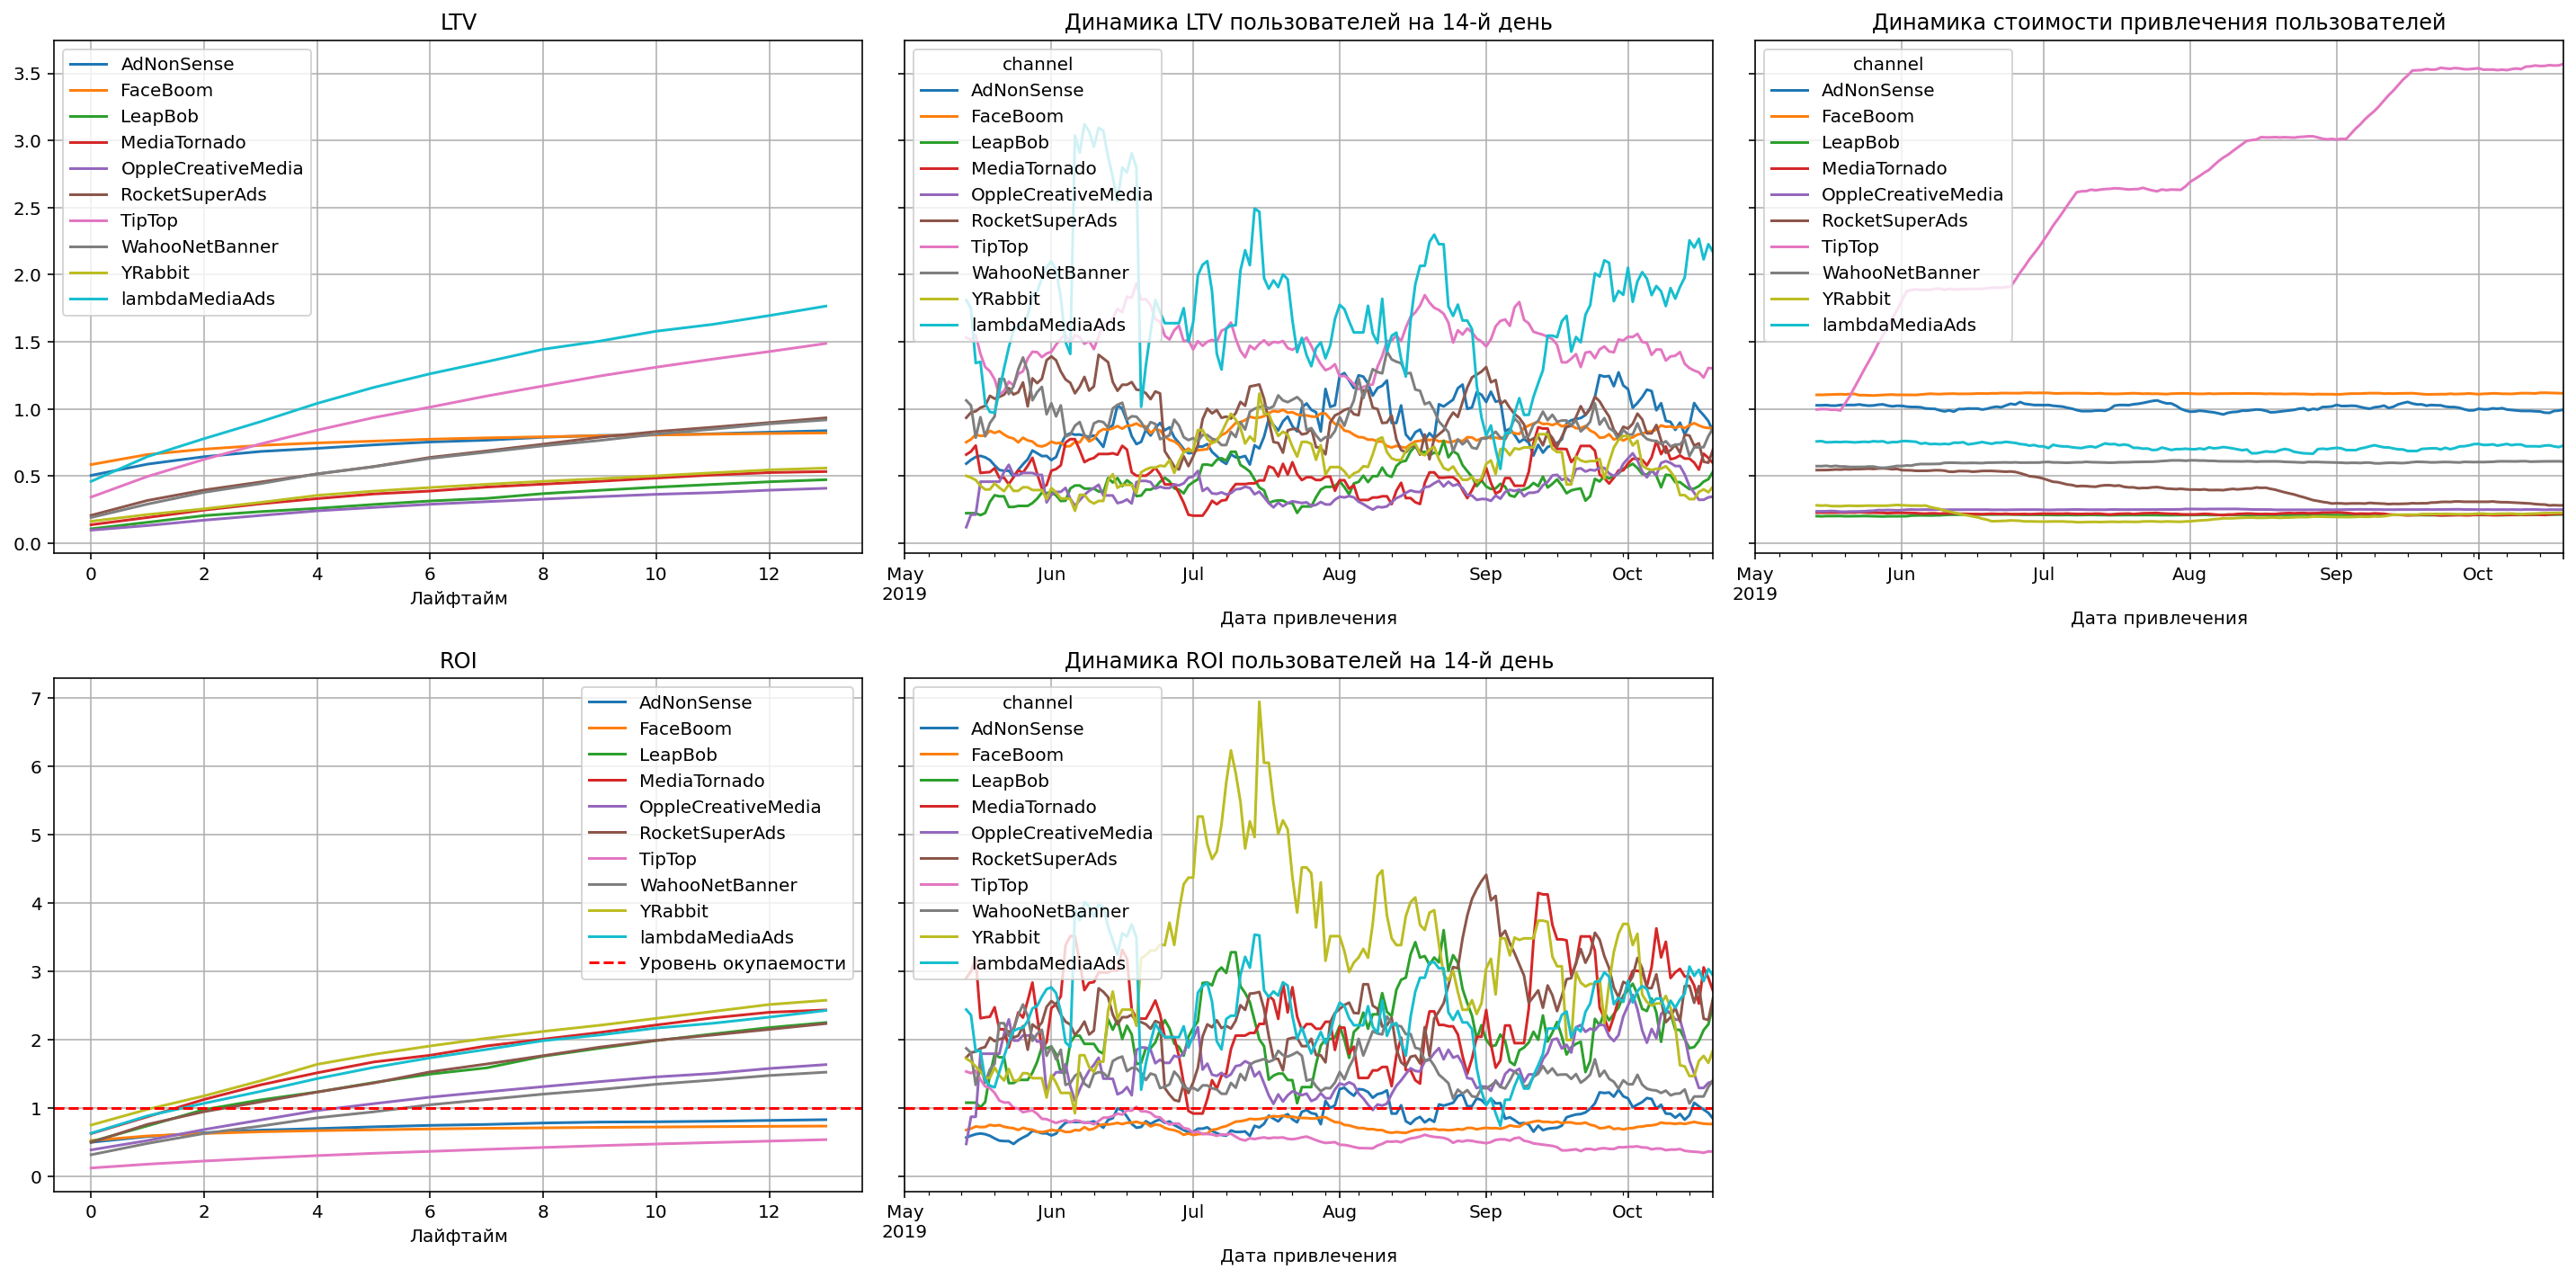

In [42]:
# считаем LTV и ROI, с dimensions по рекламным каналам
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = dimensions
)

# строим графики LTV, CAC, ROI
# сглаживание window=7 по умолчанию, изменим на 14 дней
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

* Реклама по рекламным каналам: AdNonSense, FaceBoom, Tip-Top - не окупается, возможно стоит понизить их доли и повысить другие доли, либо отказаться от них вовсе.
* У Tip-Top очень завысилась цена привлечения пользователей в 4 раза, также он самый не выгодный по ROI, стоит от него отказаться.
* Самые лучшие показатели по окупаемости у рекламных каналов: YRabbit, MediaTornado, lambdaMeadiAds, LeapBob, RocketSuperAds, стоит увеличить их долю.

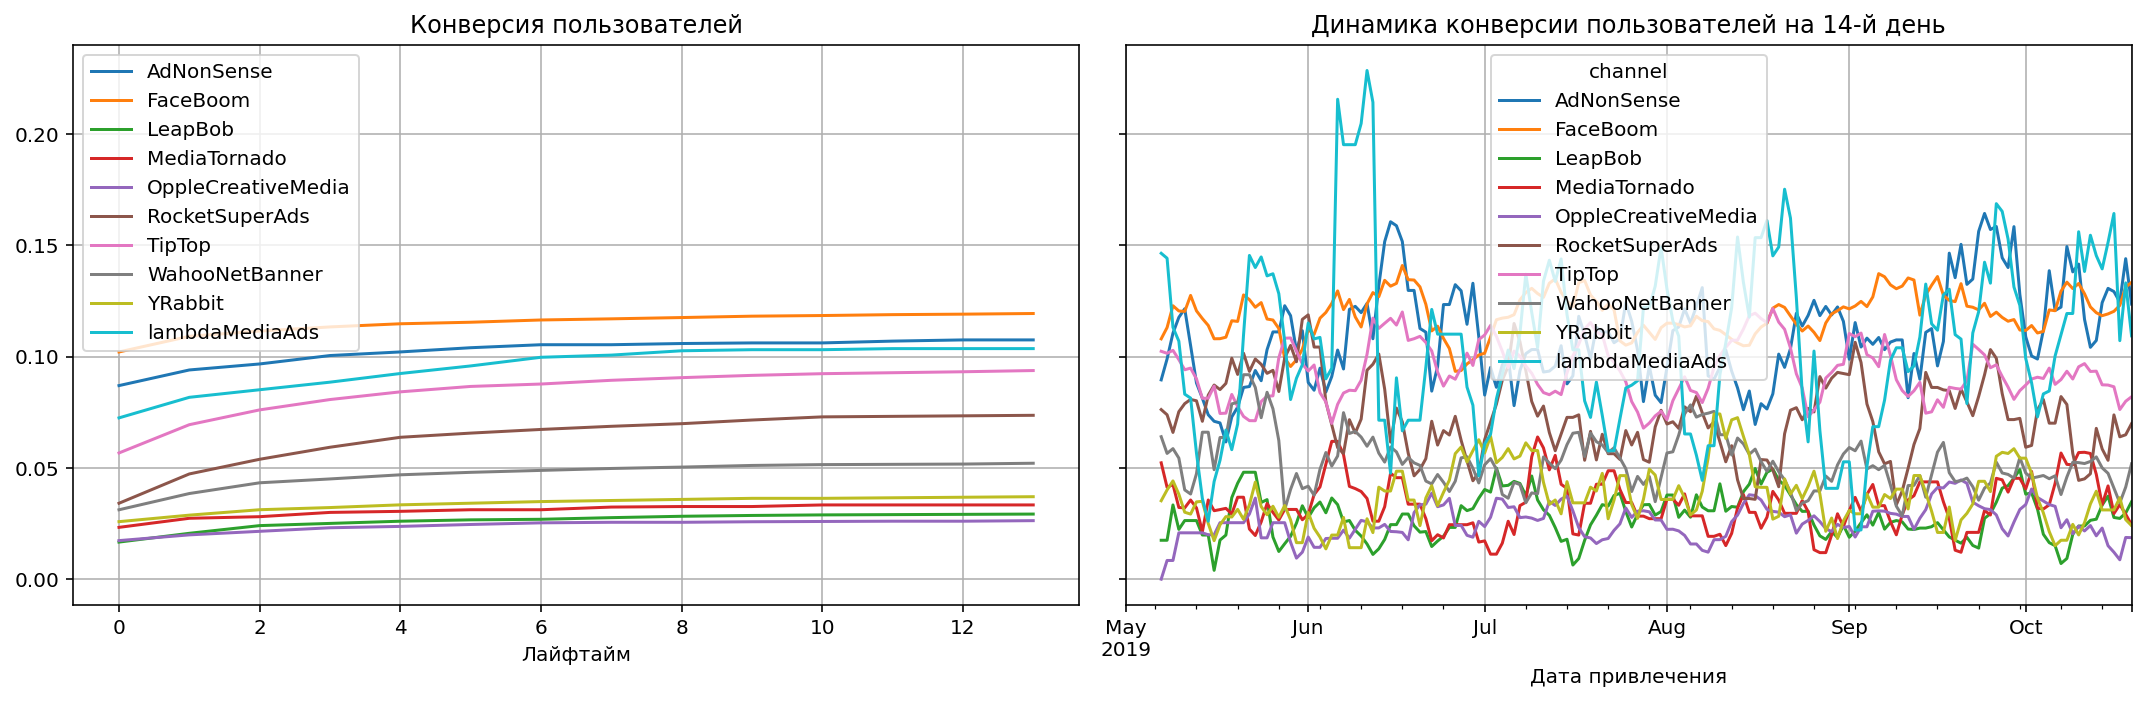

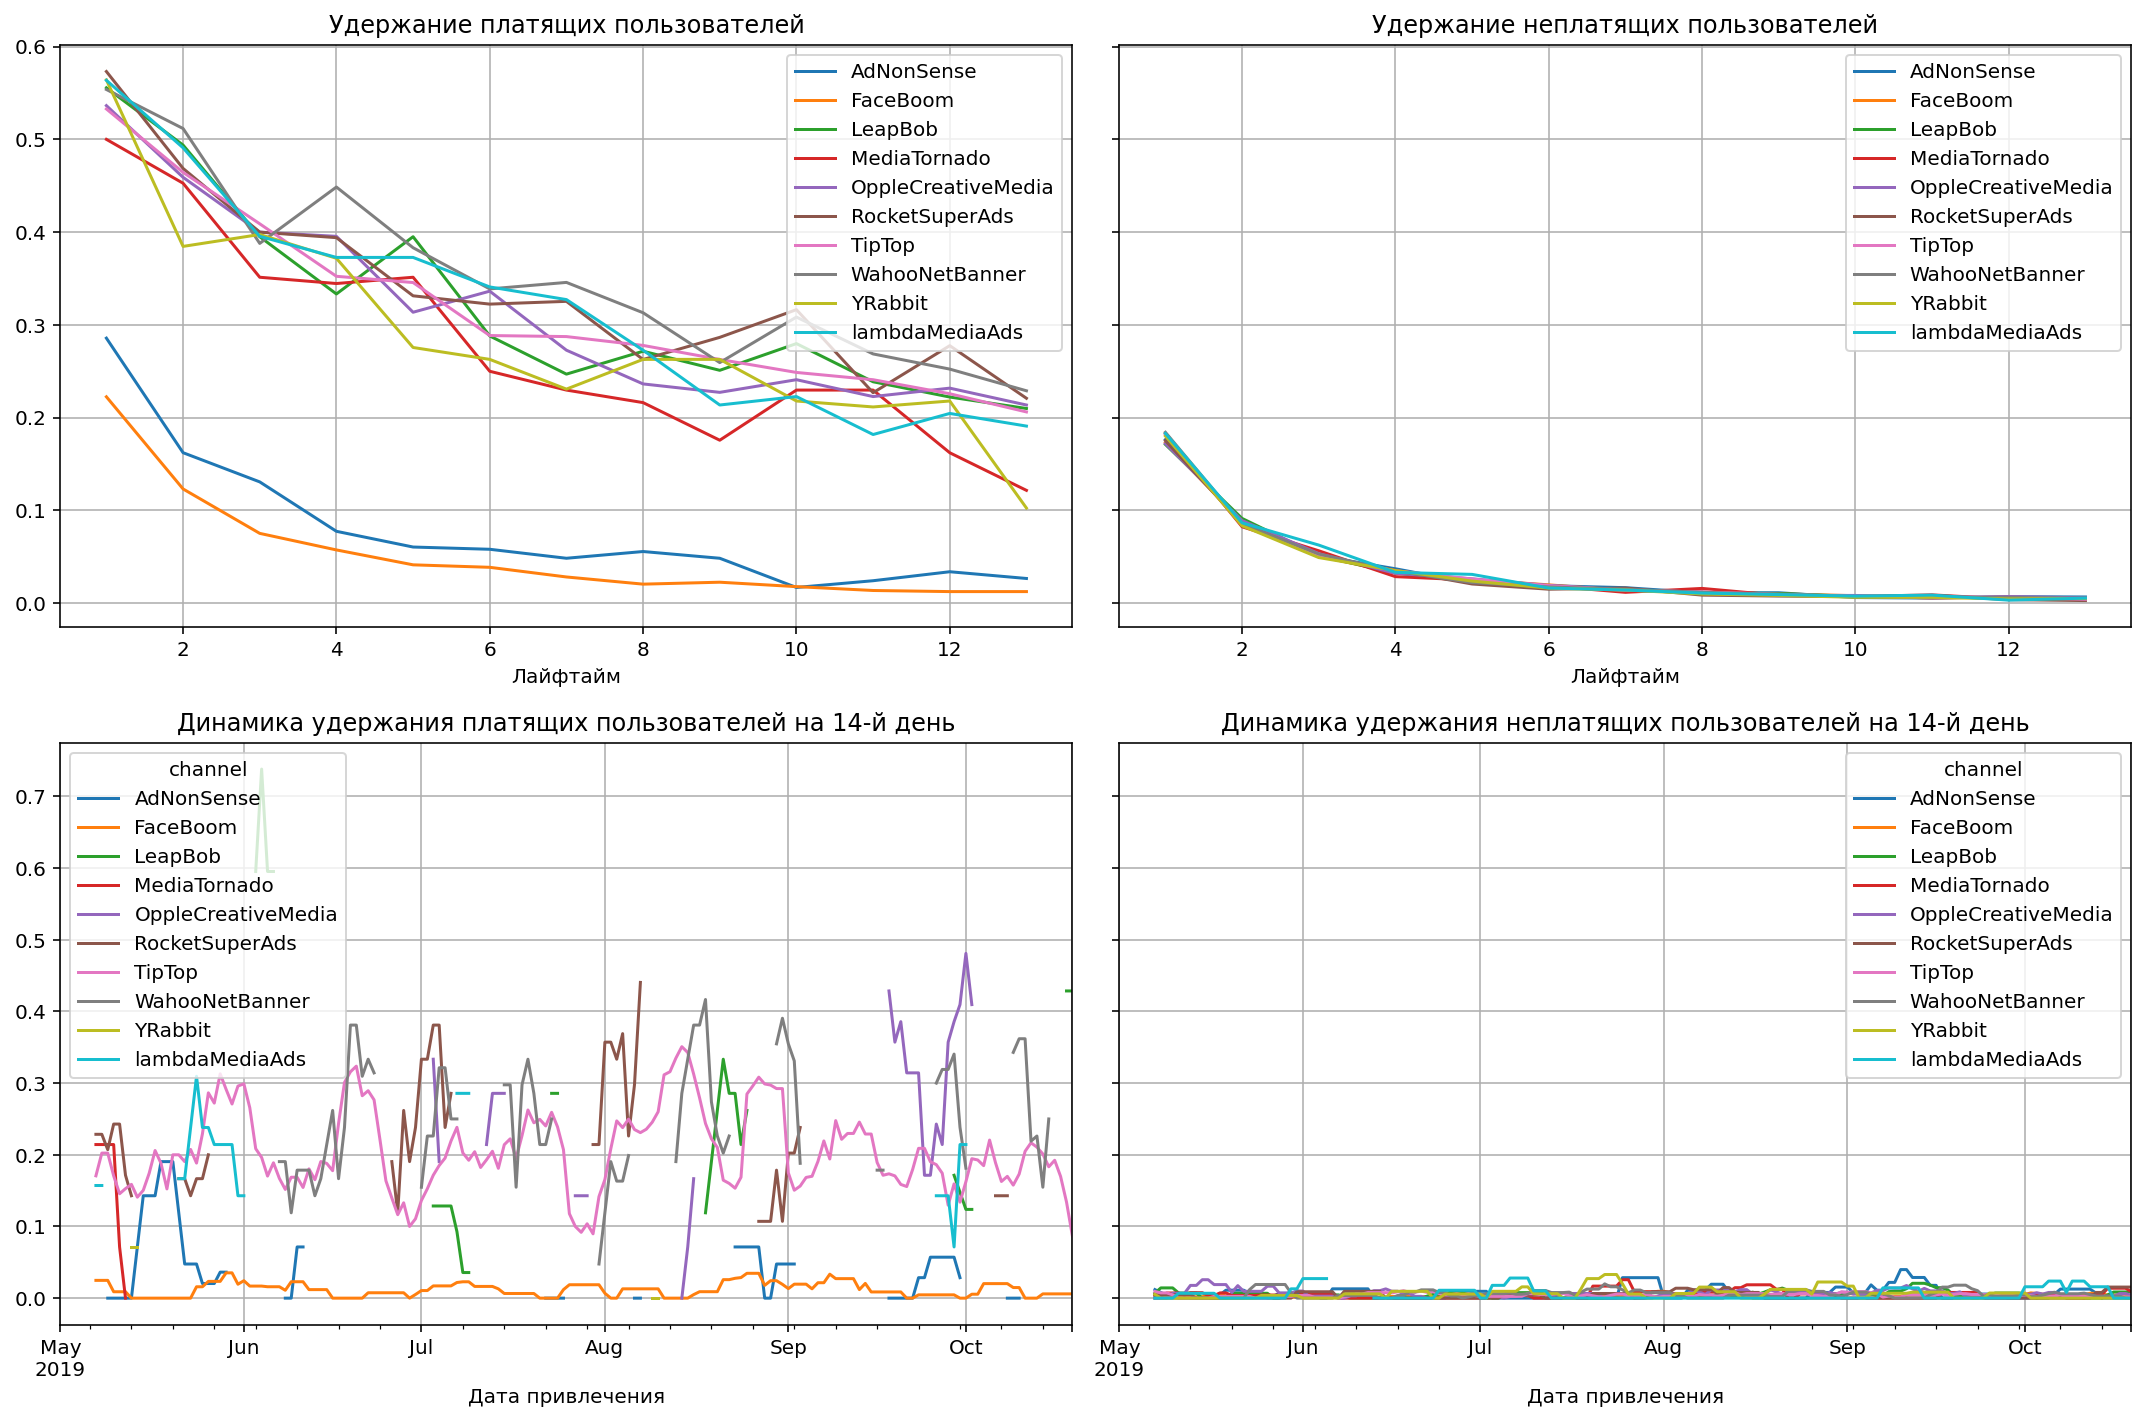

In [43]:
# дополнительно посмотрим конверсию и удержанию по рекламным каналам
dimensions = ['channel']

# смотрим конверсию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions
)
# строим график конверсии
plot_conversion(conversion_grouped, conversion_history, horizon_days) 
# сглаживание window=7 по умолчанию


# смотрим удержание
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions
)
# строим график удержания
plot_retention(retention_grouped, retention_history, horizon_days)
# сглаживание window=7 по умолчанию

* Удержание у AdNonSense, FaceBoom самое плохое, близко к 0 уже почти через неделю. Возможно методы привлечения не качественные и обещают что то другое, надо от них отказаться.

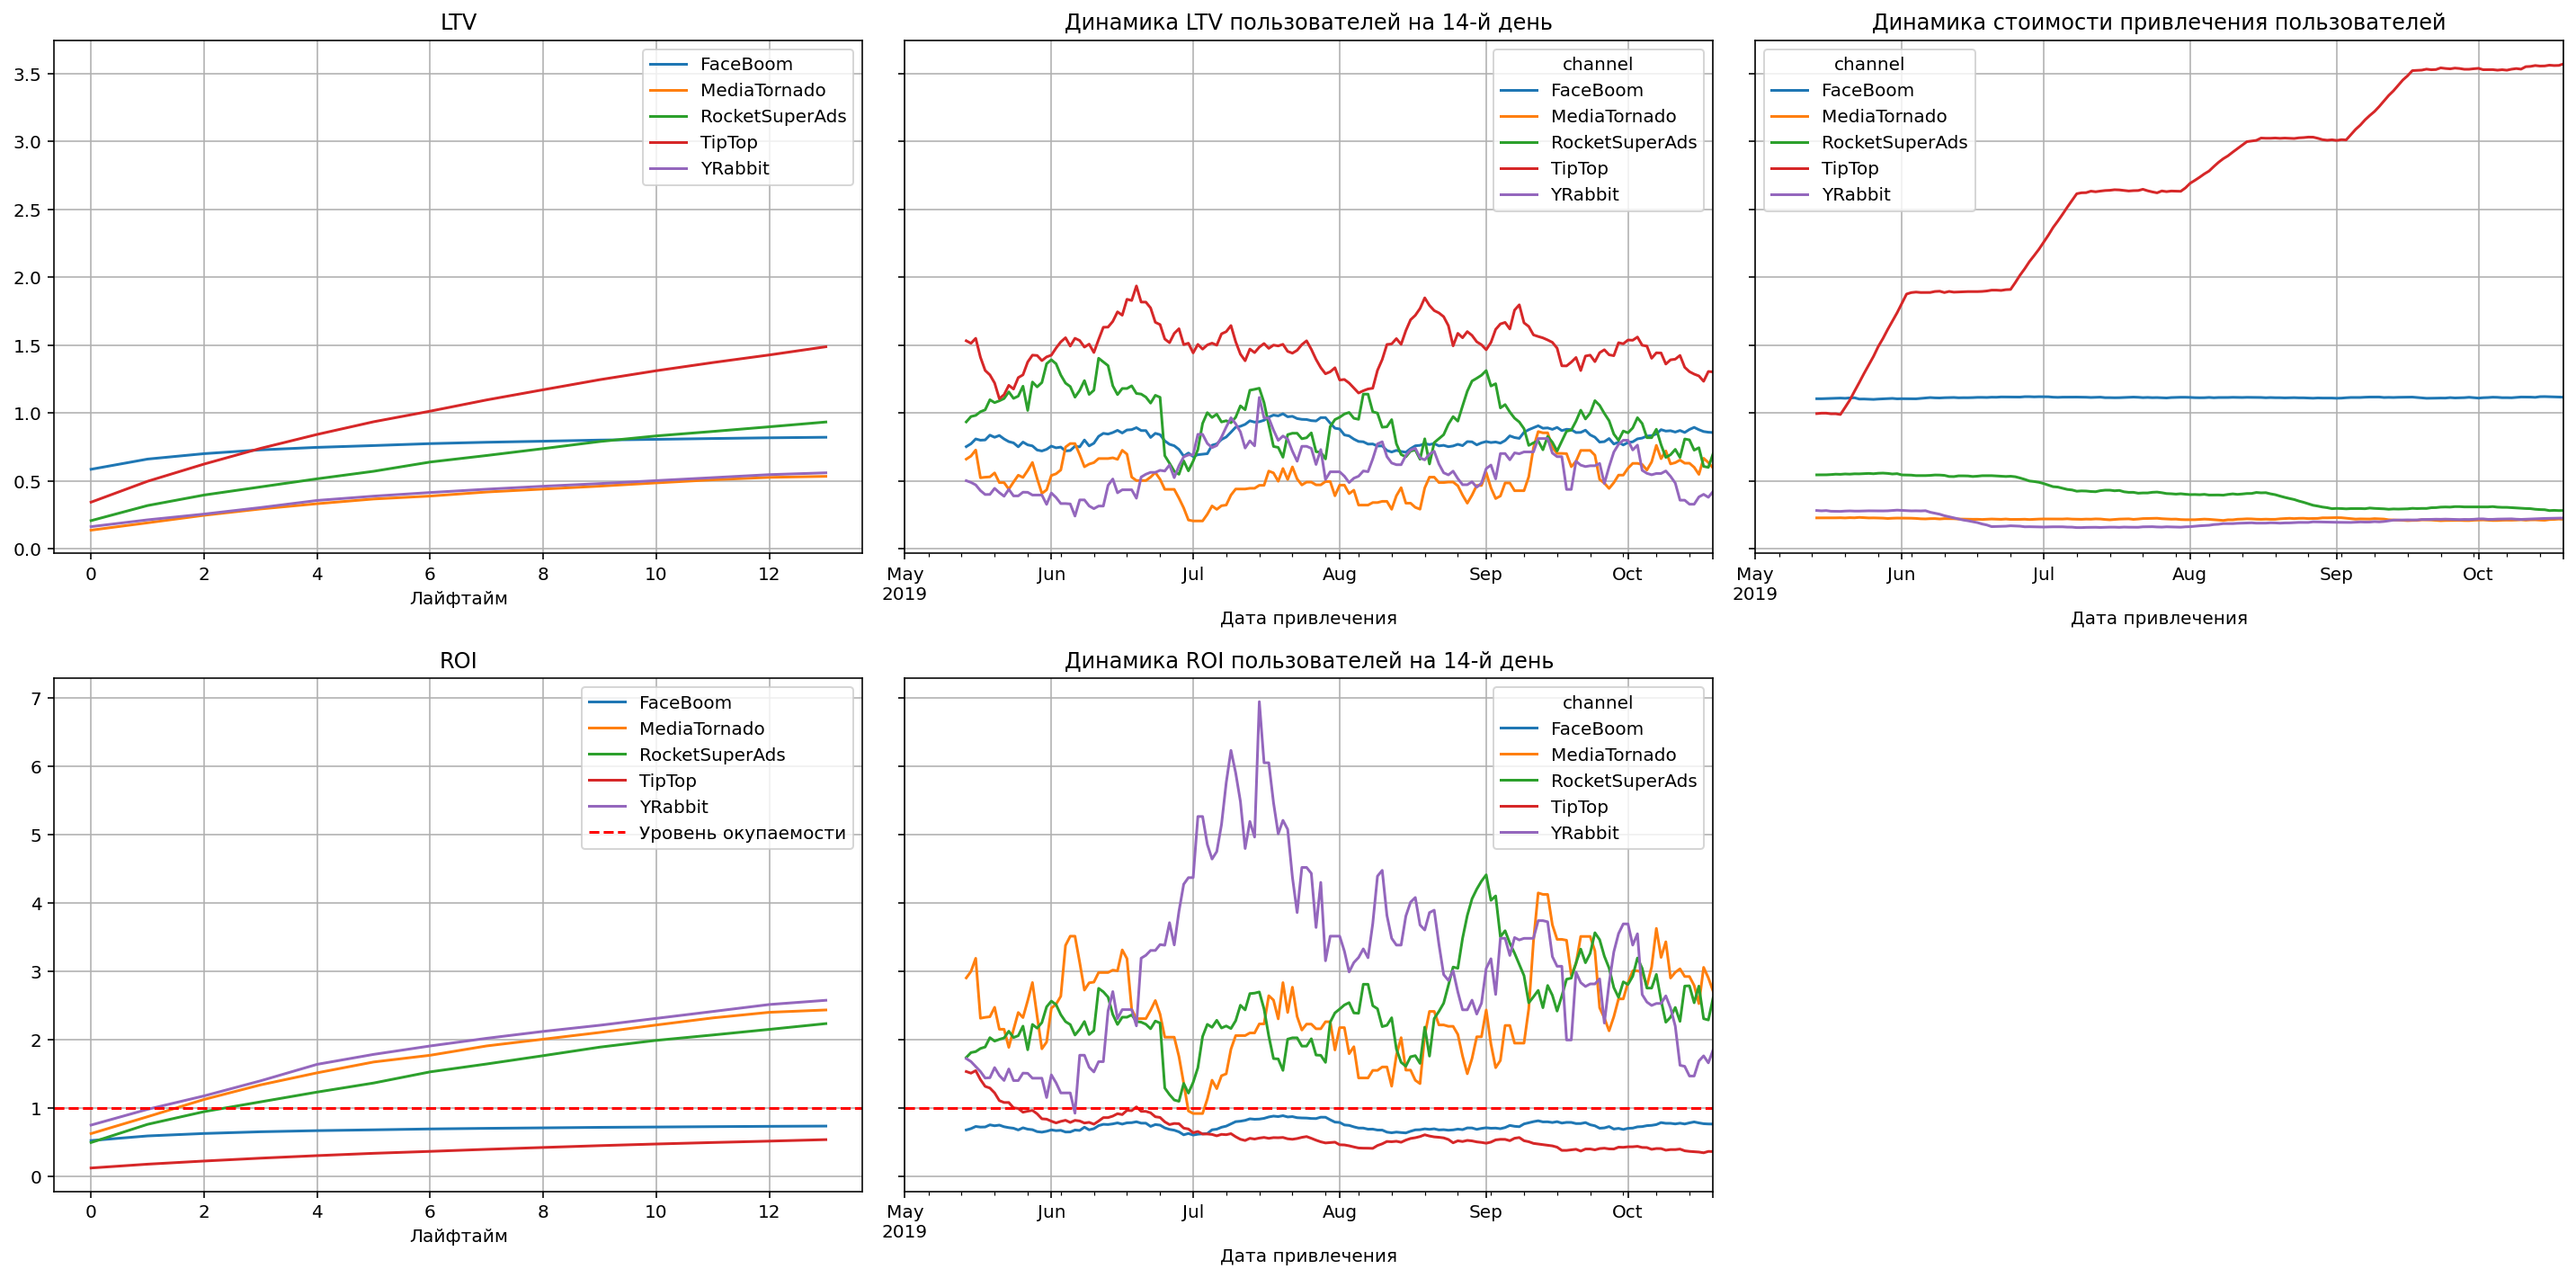

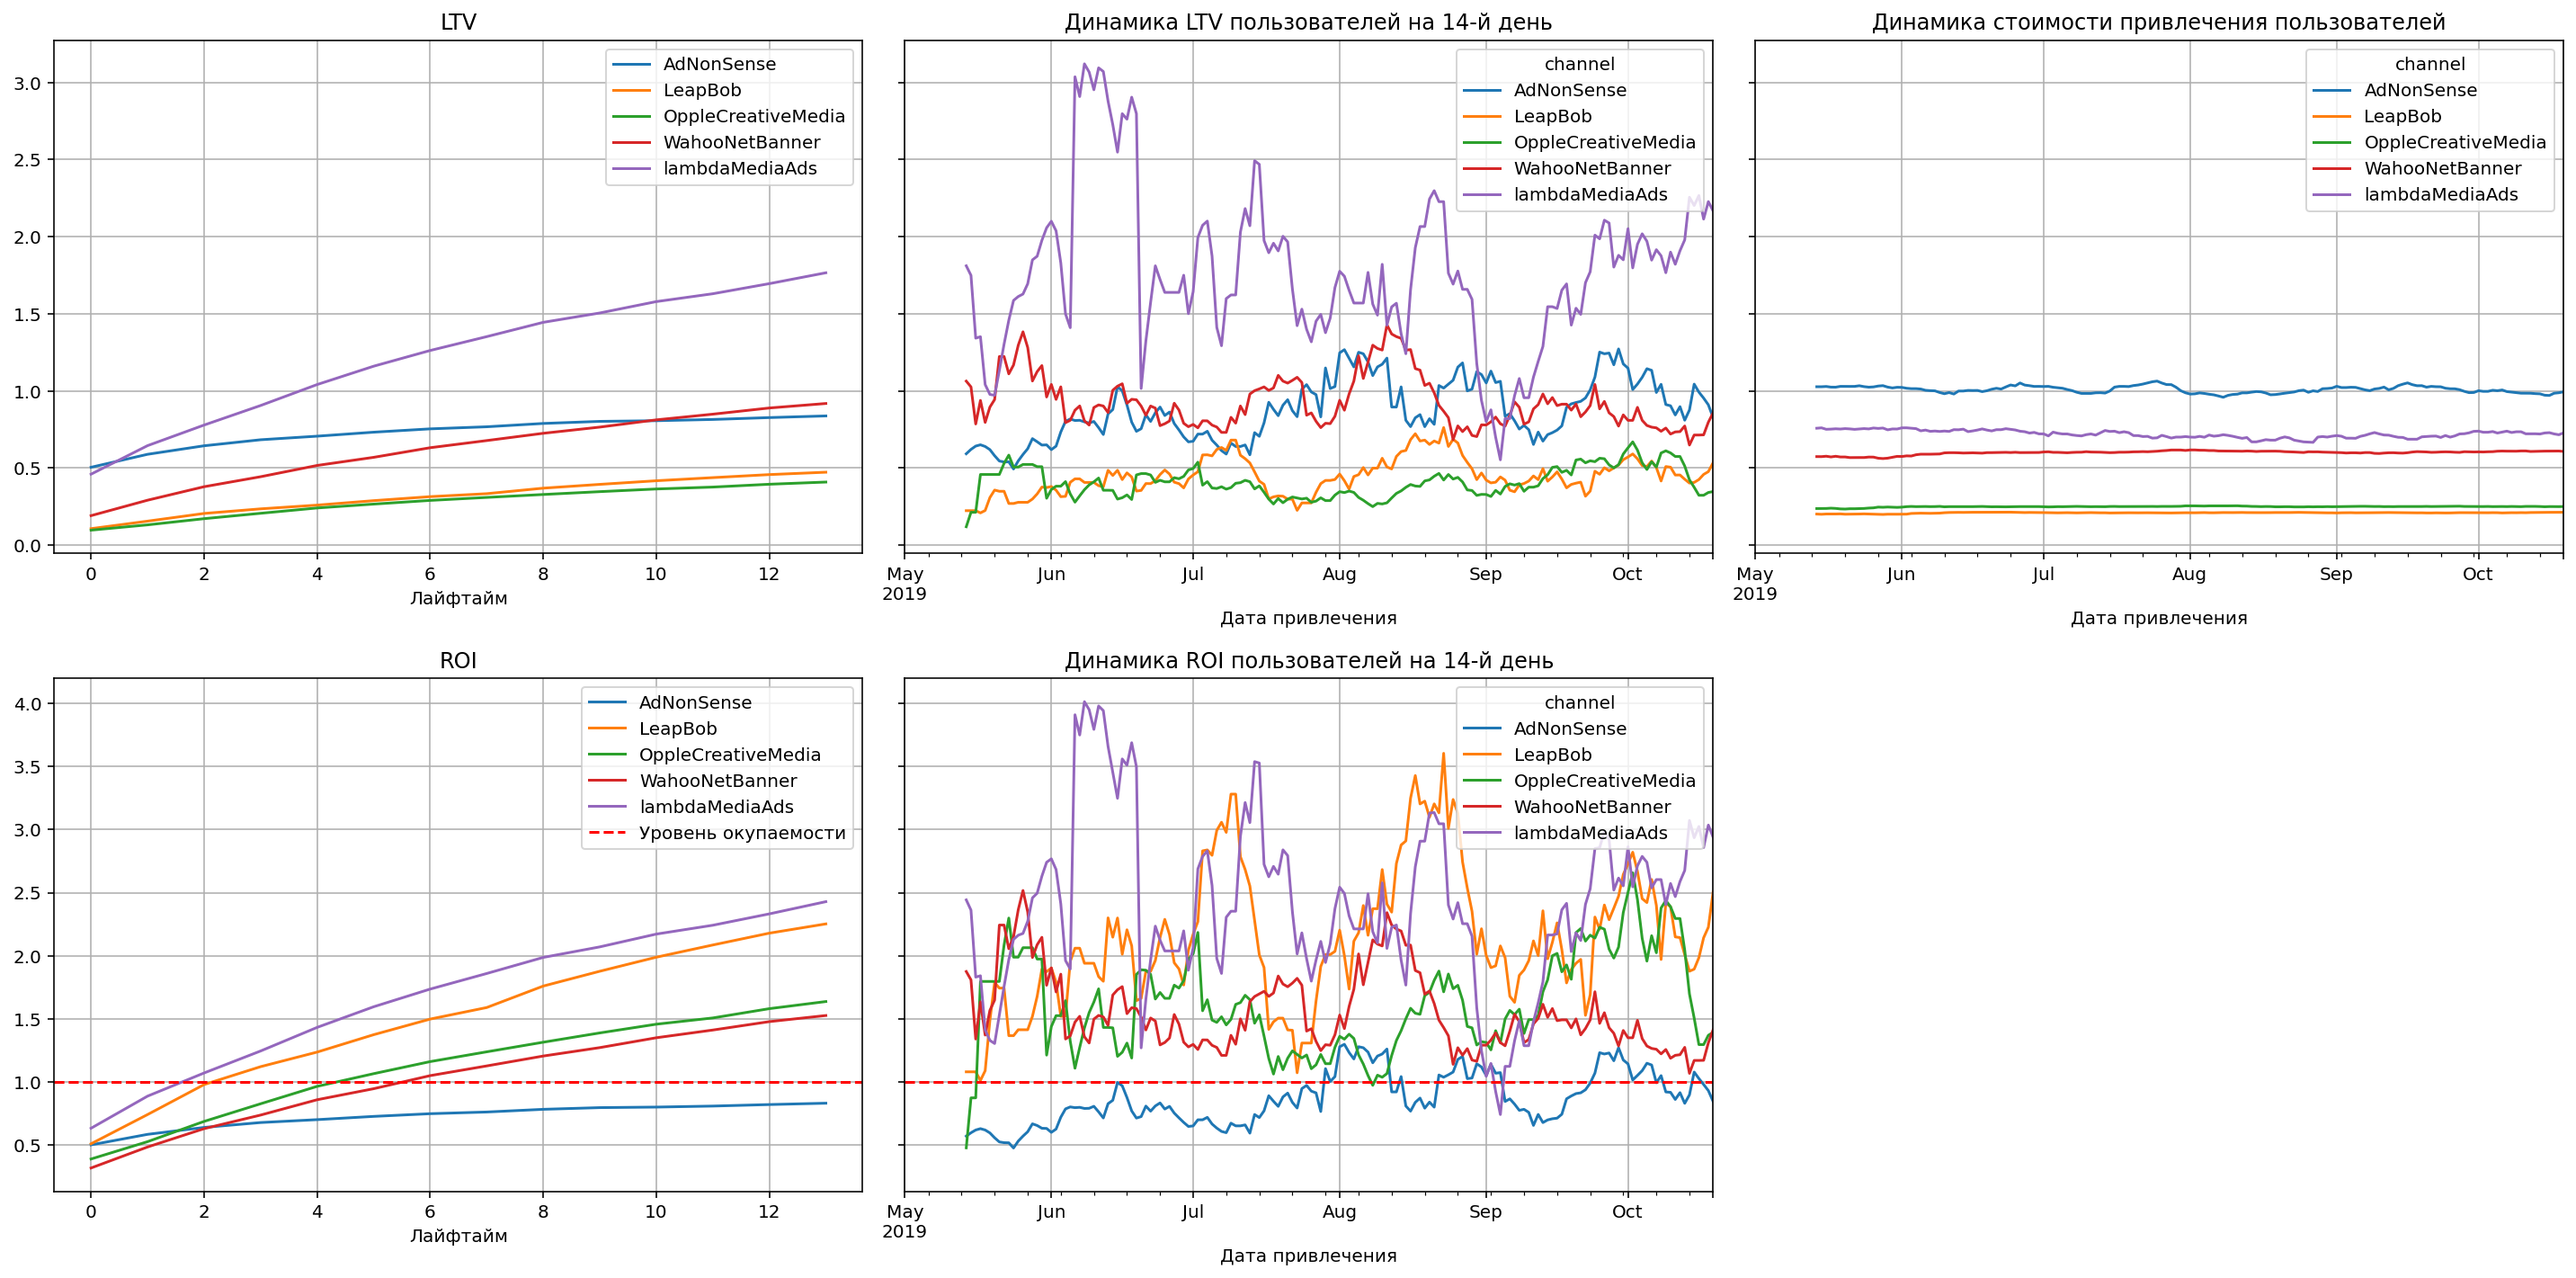

In [44]:
# добавим графики по рекл каналам, в разрезе США
# считаем LTV и ROI, с dimensions по рекламным каналам
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    (profiles.query('region == "United States"')), orders, observation_date, horizon_days, dimensions = dimensions
)
# строим графики LTV, CAC, ROI
# сглаживание window=7 по умолчанию, изменим на 14 дней
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)


# добавим графики по рекл каналам, в разрезе НЕ США
# считаем LTV и ROI, с dimensions по рекламным каналам
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    (profiles.query('region != "United States"')), orders, observation_date, horizon_days, dimensions = dimensions
)
# строим графики LTV, CAC, ROI
# сглаживание window=7 по умолчанию, изменим на 14 дней
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

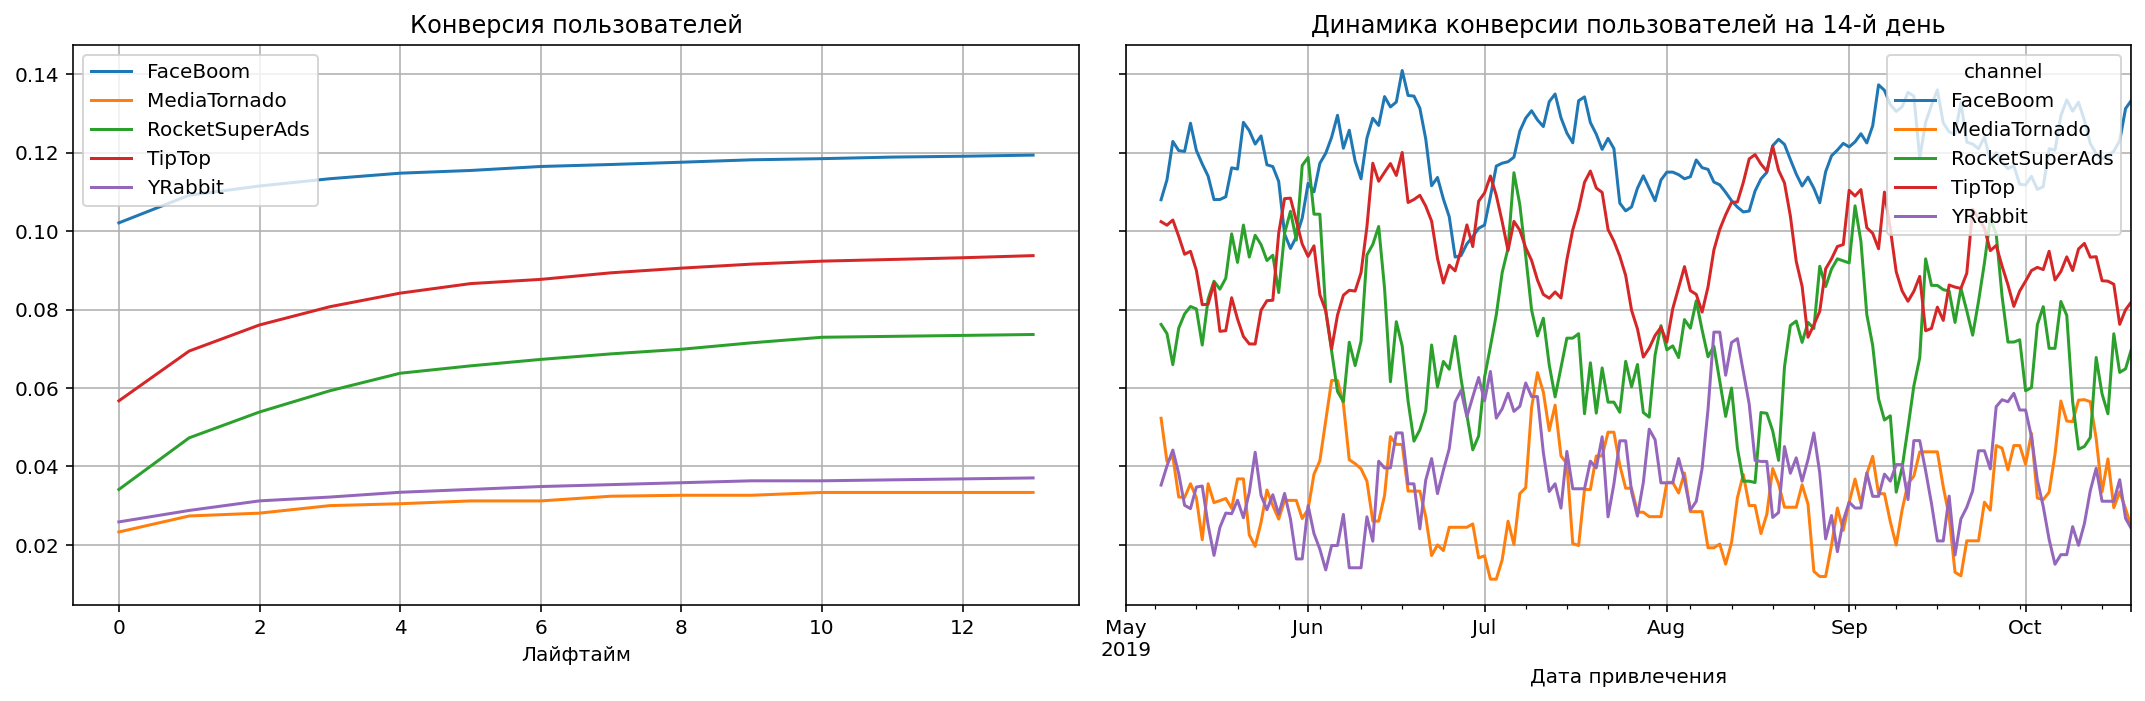

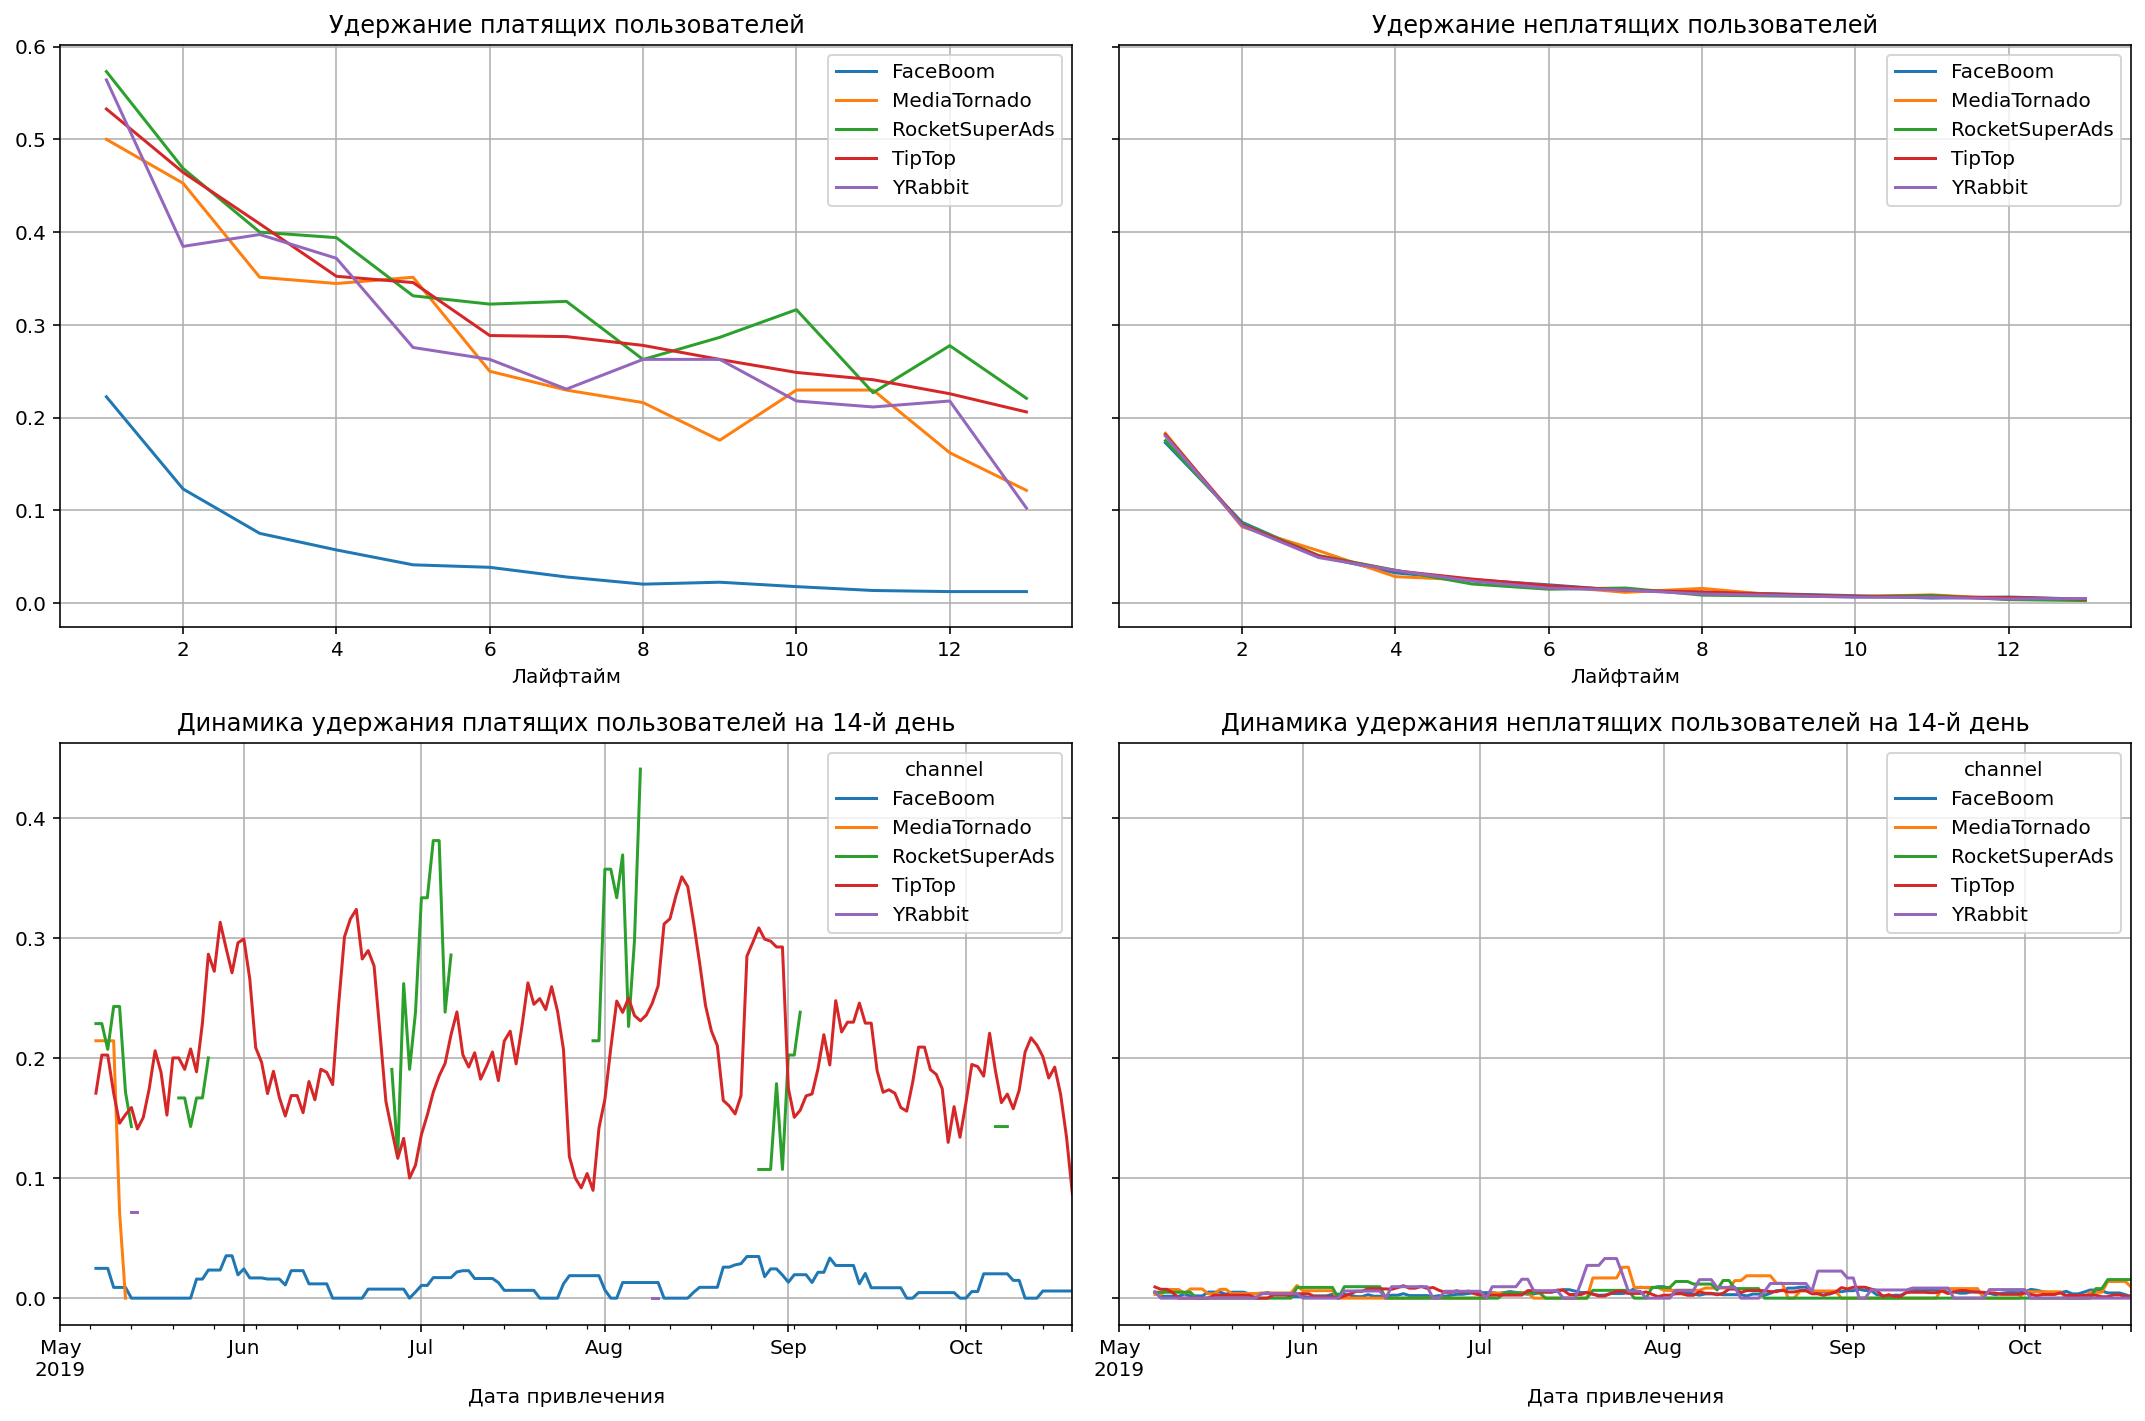

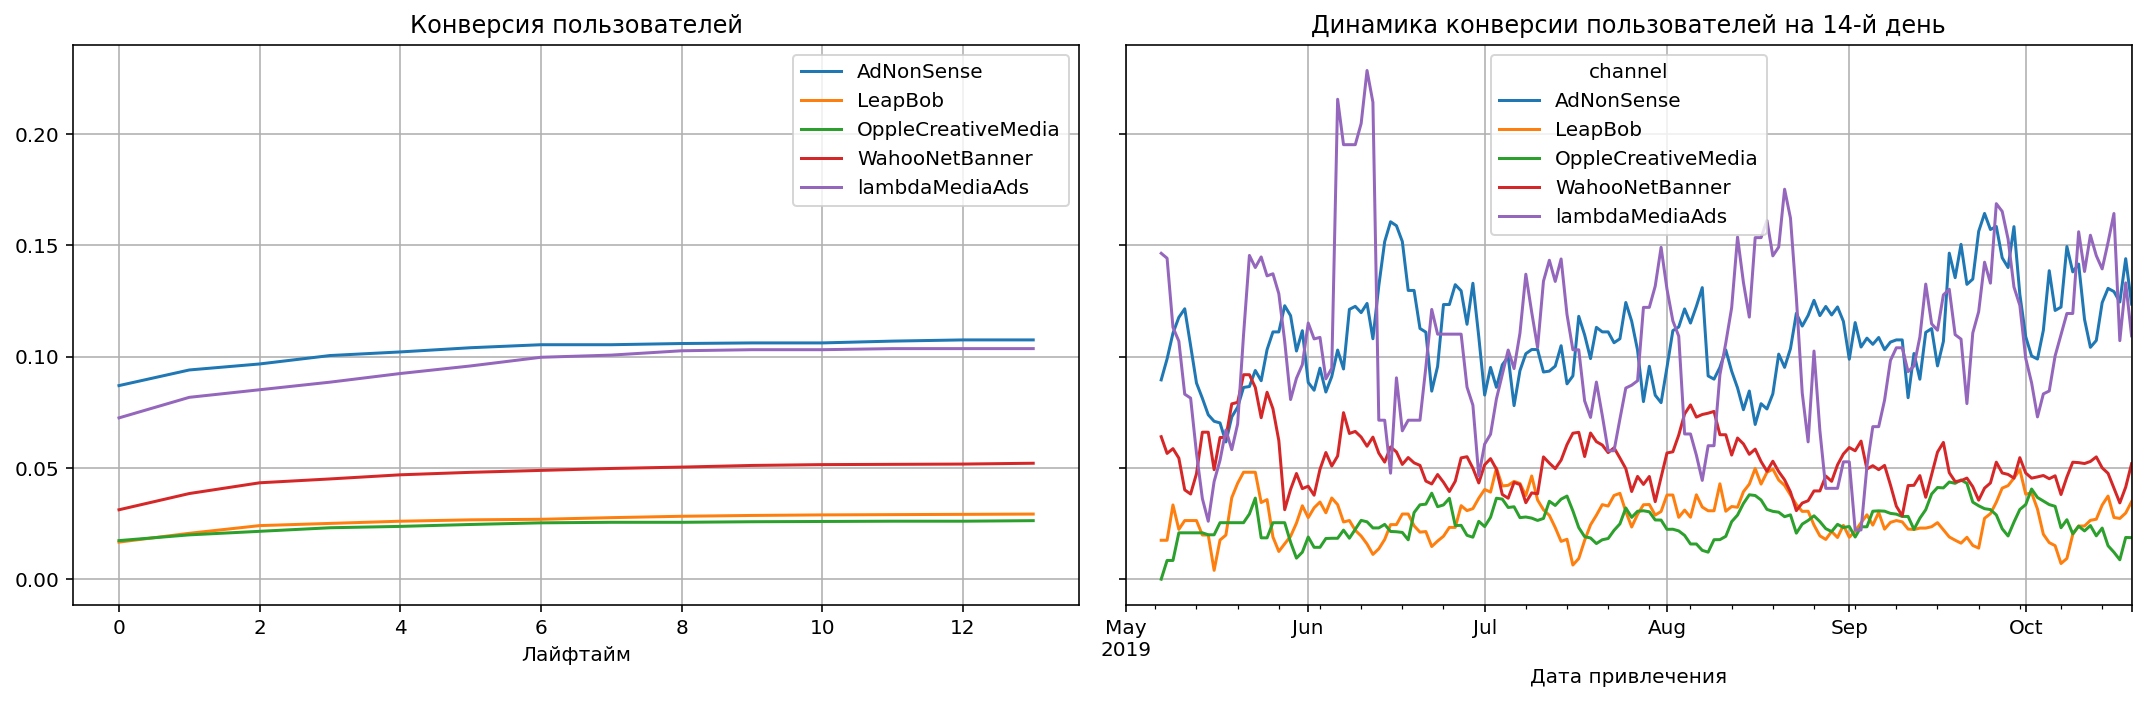

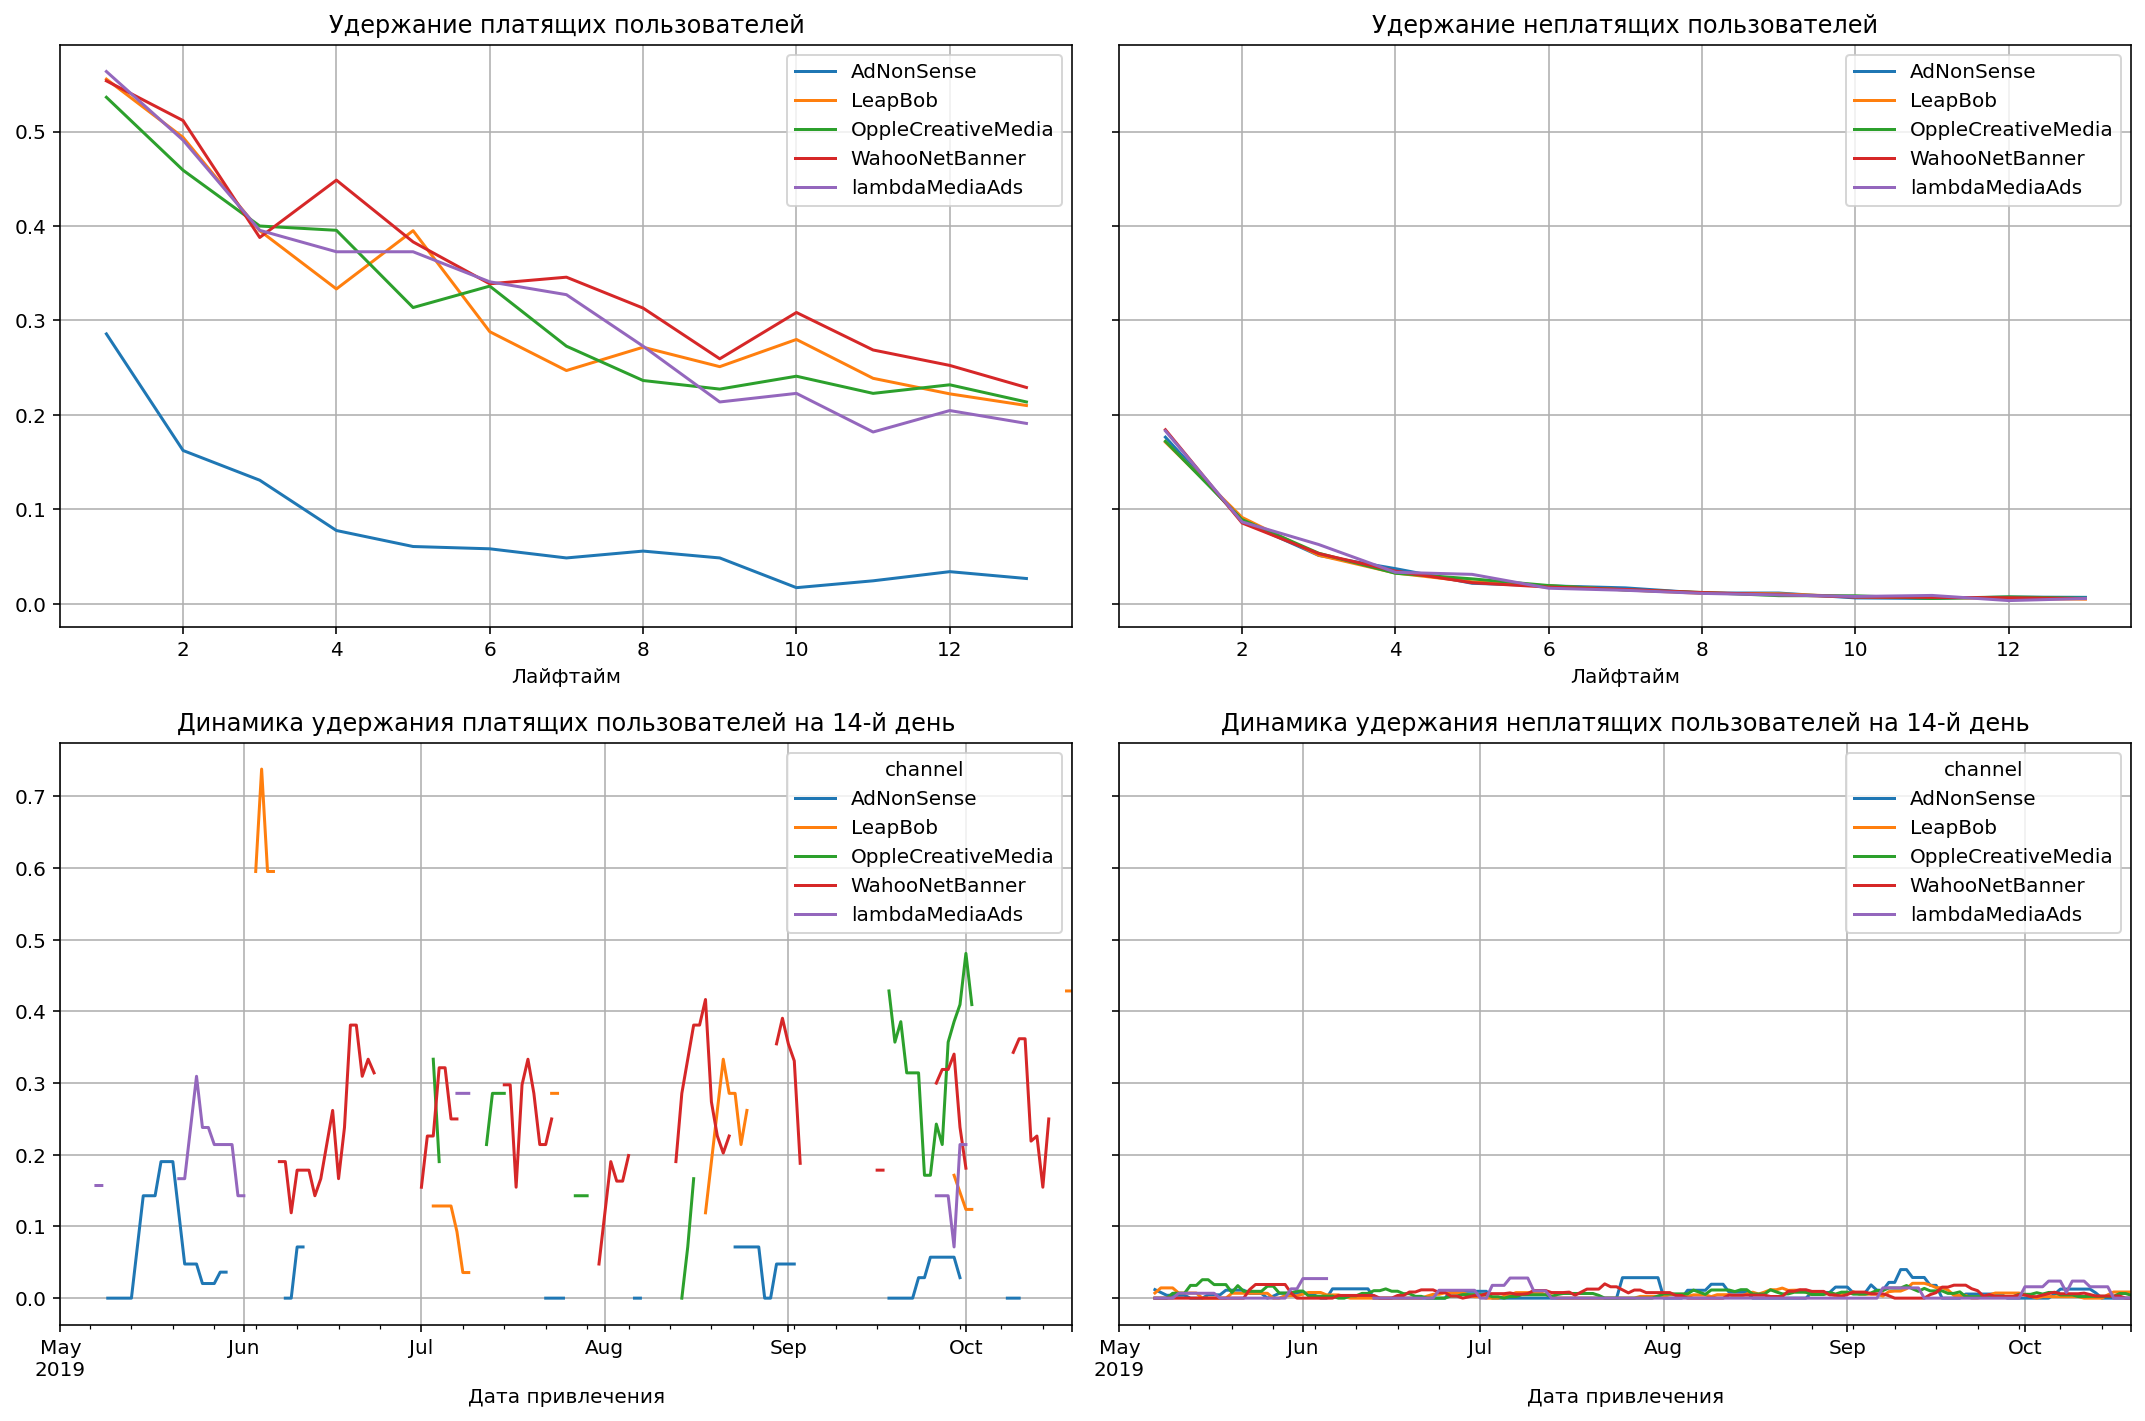

In [45]:
# смотрим конверсию в США 
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    (profiles.query('region == "United States"')), orders, observation_date, horizon_days, dimensions
)
# строим график конверсии
plot_conversion(conversion_grouped, conversion_history, horizon_days) 
# сглаживание window=7 по умолчанию

# смотрим удержание
retention_raw, retention_grouped, retention_history = get_retention(
    (profiles.query('region == "United States"')), visits, observation_date, horizon_days, dimensions
)
# строим график удержания
plot_retention(retention_grouped, retention_history, horizon_days)
# сглаживание window=7 по умолчанию

# смотрим конверсию НЕ в США
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    (profiles.query('region != "United States"')), orders, observation_date, horizon_days, dimensions
)
# строим график конверсии
plot_conversion(conversion_grouped, conversion_history, horizon_days) 
# сглаживание window=7 по умолчанию

# смотрим удержание
retention_raw, retention_grouped, retention_history = get_retention(
    (profiles.query('region != "United States"')), visits, observation_date, horizon_days, dimensions
)
# строим график удержания
plot_retention(retention_grouped, retention_history, horizon_days)
# сглаживание window=7 по умолчанию

### 5.6 Ответьте на вопросы:
1. Окупается ли реклама, направленная на привлечение пользователей в целом?
    * Реклама с пользователей PC окупаются в теч.11 дней, остальных пользователей Andriod Mac iPhone -не окупается. В динамике ROI раньше окупалась, а начиная с 6 месяца уже перестала окупаться и надо что то предпринимать.
2. Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    * Негативное влияние на окупаемость оказывают: 
        * По устройтвам: пользователи Mac и iPhone.
        * По странам: США
        * По рекламным каналам: AdNonSense, FaceBoom, Tip-Top
3. Чем могут быть вызваны проблемы окупаемости?
      * По устройтвам пользователи Mac и iPhone дольше всех окупаются либо не окупаются вообще, но проблема скорее всего не в устройствах. Наибольшая доля держателей Mac и iPhone находиться в США.
      * По странам, на данный момент США не окупается, но это не повод уходить из страны, у неё самая лучшая Конверсия и LTV. Тут проблема в рекламных каналах для США.
      * **По рекламным каналам. Удержание у AdNonSense (в Европе), FaceBoom (в США) самое плохое и близко к 0 уже почти через неделю. Возможно методы привлечения не качественные или обещают что то другое, может у них есть техническая проблема, надо разбираться. Они не окупаются из за плохого удержания. Если не починиться удержание, то надо уменьшать их долю.**
      * **У Tip-Top (в США) очень завысилась цена привлечения пользователей в 4 раза, как итог он самый не выгодный по ROI, стоит понизить долю или пообщаться почему так произошло и почему так не стабильно завысилась цена.**
      * Самые лучшие показатели по окупаемости у рекламных каналов: YRabbit, MediaTornado, lambdaMeadiAds, LeapBob, RocketSuperAds, стоит увеличить их долю.

## 6. Вывод
Почему компания терпит убытки?
1. Причины неэффективности привлечения пользователей:
    - Плохое удержание у рекламных каналов у AdNonSense, FaceBoom, привлекают не качественных пользователей, соответственно они не окупаются. А на FaceBoom идет очень много расходов.
    - У рекламного канала Tip-Top в 4 раза завышена стоимость привлечения 1 пользователя, соответственно он не окупается тоже.
2. Рекомендации для отдела маркетинга:
    - По рекламным каналам. Удержание у AdNonSense (в Европе), FaceBoom (в США) самое плохое и близко к 0 уже почти через неделю. Возможно методы привлечения не качественные или обещают что то другое, может у них есть техническая проблема, надо разбираться. Они не окупаются из за плохого удержания. Если не починиться удержание, то надо уменьшать их долю.
    - У Tip-Top (в США) очень завысилась цена привлечения пользователей в 4 раза, как итог он самый не выгодный по ROI, стоит понизить долю или пообщаться почему так произошло и почему так не стабильно завысилась цена.
    - Увеличить долю вложений в рекламные каналы (наилучшие по окупаемости): YRabbit, MediaTornado, lambdaMeadiAds, LeapBob, RocketSuperAds.